In [1]:
import re
import pandas as pd
import spacy
from spacy import displacy
# nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [2]:
from google.colab import files
upload = files.upload()

Saving triplets.csv to triplets.csv


In [ ]:
##### Install the Coref library
# !pip install spacy-coref

import spacy

# Load the English model and the Coref component
nlp = spacy.load("en_core_web_sm")
# coref = spacy.load("en_coref_md")

In [ ]:
df = pd.read_csv("data/pubmedqa_new.csv")

In [ ]:
df.head()

Context  \
0  ['Programmed cell death (PCD) is the regulated death of cells within an organism. The lace plant (Aponogeton madagascariensis) produces perforations in its leaves through PCD. The leaves of the pl...   
1  ['Assessment of visual acuity depends on the optotypes used for measurement. The ability to recognize different optotypes differs even if their critical details appear under the same visual angle....   
2  ['Apparent life-threatening events in infants are a difficult and frequent problem in pediatric practice. The prognosis is uncertain because of risk of sudden infant death syndrome.', 'Eight infan...   
3  ['The transanal endorectal pull-through (TERPT) is becoming the most popular procedure in the treatment of Hirschsprung disease (HD), but overstretching of the anal sphincters remains a critical i...   
4  ['Telephone counseling and tailored print communications have emerged as promising methods for promoting mammography screening. However, there has been little research testing, within the same ran...   

                                                                                                     Question  \
0                  Do mitochondria play a role in remodelling lace plant leaves during programmed cell death?   
1                                        Landolt C and snellen e acuity: differences in strabismus amblyopia?   
2                             Syncope during bathing in infants, a pediatric form of water-induced urticaria?   
3  Are the long-term results of the transanal pull-through equal to those of the transabdominal pull-through?   
4                                        Can tailored interventions increase mammography use among HMO women?   

                                                                                                                                                                                                    Answer  
0  Results depicted mitochondrial dynamics in vivo as PCD progresses within the lace plant, and highlight the correlation of this organelle with other organelles during developmental PCD. To the best...  
1  Using the charts described, there was only a slight overestimation of visual acuity by the Snellen E compared to the Landolt C, even in strabismus amblyopia. Small differences in the lower visual ...  
2                                                                                                                               "Aquagenic maladies" could be a pediatric form of the aquagenic urticaria.  
3  Our long-term study showed significantly better (2-fold) results regarding the continence score for the abdominal approach compared with the transanal pull-through. The stool pattern and enterocol...  
4  The effects of the intervention were most pronounced after the first intervention. Compared to usual care, telephone counseling seemed particularly effective at promoting change among nonadherent ...

## Coreference resolution

In [ ]:
# import spacy
# import neuralcoref
# import scispacy
# import en_ner_bionlp13cg_md

# nlp = en_ner_bionlp13cg_md.load()
# # nlp = spacy.load('en_core_web_sm')


# ##Add neuralcoref to the pipeline.
# neuralcoref.add_to_pipe(nlp)

# ##Check if there were resolved coreferences
# for doc in df["Context"]:
#     doc = nlp(doc)
    
#     ##Check if there were resolved coreferences
#     doc._.has_coref
    
#     for cluster in doc._.coref_clusters:
#         for reference in cluster:
#         #each of these is a Span object in Spacy
#             print(reference)
#             #starting index of this reference in the text
#             print(reference.start) 
#             #ending index of this reference in the text
#             print(reference.end)

In [ ]:
# for doc in df["Context"]:
#     doc = nlp(doc)
#     resolved_doc = doc._.coref_resolved
#     print(resolved_doc)
#     df["Context resolved coref"] = resolved_doc

In [ ]:
# pip install neuralcoref

In [ ]:
import spacy
#import neuralcoref

In [ ]:
nlp = spacy.load('en_core_web_sm')
#neuralcoref.add_to_pipe(nlp)

C:\Users\Mohcine\anaconda3\lib\site-packages\spacy\util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.3.0) was trained with spaCy v3.3 and may not be 100% compatible with the current version (3.5.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
#!pip install neuralcoref --no-binary neuralcoref

In [ ]:
for doc in df["Context"]:
    doc = nlp(doc)
    for tok in doc:
        print(tok.text, "...", tok.dep_)

[ ... dep
' ... punct
Programmed ... amod
cell ... compound
death ... nsubj
( ... punct
PCD ... appos
) ... punct
is ... ROOT
the ... det
regulated ... amod
death ... attr
of ... prep
cells ... pobj
within ... prep
an ... det
organism ... pobj
. ... punct
The ... det
lace ... compound
plant ... nsubj
( ... punct
Aponogeton ... compound
madagascariensis ... appos
) ... punct
produces ... ROOT
perforations ... dobj
in ... prep
its ... poss
leaves ... pobj
through ... prep
PCD ... pobj
. ... punct
The ... det
leaves ... nsubj
of ... prep
the ... det
plant ... pobj
consist ... ROOT
of ... prep
a ... det
latticework ... pobj
of ... prep
longitudinal ... amod
and ... cc
transverse ... conj
veins ... pobj
enclosing ... acl
areoles ... dobj
. ... punct
PCD ... nsubj
occurs ... ROOT
in ... prep
the ... det
cells ... pobj
at ... prep
the ... det
center ... pobj
of ... prep
these ... det
areoles ... pobj
and ... cc
progresses ... compound
outwards ... conj
, ... punct
stopping ... advcl
approxima

[ ... dep
' ... punct
Anchoring ... amod
vignettes ... nsubj
are ... ROOT
brief ... amod
texts ... attr
describing ... acl
a ... det
hypothetical ... amod
character ... dobj
who ... nsubj
illustrates ... relcl
a ... det
certain ... amod
fixed ... amod
level ... dobj
of ... prep
a ... det
trait ... pobj
under ... prep
evaluation ... pobj
. ... punct
This ... det
research ... nsubj
uses ... ROOT
vignettes ... dobj
to ... aux
elucidate ... xcomp
factors ... dobj
associated ... acl
with ... prep
sleep ... compound
disorders ... pobj
in ... prep
adult ... compound
Japanese ... pobj
before ... prep
and ... cc
after ... conj
adjustment ... pobj
for ... prep
reporting ... pcomp
heterogeneity ... dobj
in ... prep
self ... compound
- ... punct
reports ... pobj
. ... punct
This ... det
study ... nsubj
also ... advmod
evaluates ... ROOT
the ... det
need ... dobj
for ... prep
adjusting ... pcomp
for ... prep
reporting ... pcomp
heterogeneity ... dobj
in ... prep
the ... det
management ... pobj
of .

[ ... dep
' ... punct
Electronic ... amod
health ... compound
records ... nsubj
have ... ROOT
the ... det
potential ... dobj
to ... aux
facilitate ... acl
family ... compound
history ... compound
use ... dobj
by ... prep
primary ... amod
care ... compound
physicians ... pobj
( ... punct
PCPs ... appos
) ... punct
to ... aux
provide ... advcl
personalized ... amod
care ... dobj
. ... punct
The ... det
objective ... nsubj
of ... prep
this ... det
study ... pobj
was ... ROOT
to ... aux
determine ... xcomp
whether ... mark
automated ... amod
, ... punct
at ... nmod
- ... punct
the ... det
- ... punct
visit ... pobj
tailored ... amod
prompts ... nsubj
about ... prep
family ... compound
history ... compound
risk ... pobj
change ... ccomp
PCP ... compound
behavior ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
Automated ... xcomp
, ... punct
tailored ... conj
prompts ... dobj
highlighting ... acl
familial ... amod
risk ... dobj
for ... prep
heart ... compound
disease ... pobj
, ... 

[ ... dep
' ... punct
Elevated ... amod
resting ... amod
heart ... compound
rate ... nsubj
( ... punct
RHR ... appos
) ... punct
is ... ROOT
a ... det
neglected ... amod
marker ... attr
in ... prep
cardiovascular ... amod
risk ... compound
factor ... compound
studies ... pobj
of ... prep
sub ... amod
- ... amod
Saharan ... amod
African ... amod
populations ... pobj
. ... punct
This ... det
study ... nsubjpass
aimed ... acl
to ... aux
determine ... advcl
the ... det
prevalence ... dobj
of ... prep
elevated ... amod
RHR ... pobj
and ... cc
other ... amod
risk ... compound
factors ... conj
for ... prep
cardiovascular ... amod
disease ... pobj
( ... punct
CVD ... appos
) ... punct
and ... cc
to ... aux
investigate ... conj
any ... det
associations ... dobj
between ... prep
RHR ... pobj
and ... cc
these ... det
risk ... compound
factors ... conj
in ... prep
a ... det
rural ... amod
population ... pobj
in ... prep
Ghana ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Cross ... amod


[ ... dep
' ... punct
Social ... amod
and ... cc
cultural ... conj
factors ... nsubj
combined ... acl
with ... prep
little ... amod
information ... pobj
may ... aux
prevent ... ROOT
the ... det
diffusion ... dobj
of ... prep
epidural ... amod
analgesia ... pobj
for ... prep
pain ... compound
relief ... pobj
during ... prep
childbirth ... pobj
. ... punct
The ... det
present ... amod
study ... nsubjpass
was ... auxpass
launched ... ROOT
contemporarily ... advmod
to ... prep
the ... det
implementation ... pobj
of ... prep
analgesia ... pobj
for ... prep
labor ... pobj
in ... prep
our ... poss
Department ... pobj
in ... prep
order ... pobj
to ... aux
perform ... acl
a ... det
2 ... nummod
years ... compound
audit ... dobj
on ... prep
its ... poss
use ... pobj
. ... punct
The ... det
goal ... nsubj
is ... ROOT
to ... aux
evaluate ... xcomp
the ... det
epidural ... amod
acceptance ... dobj
and ... cc
penetration ... conj
into ... prep
hospital ... compound
practice ... pobj
by ... prep
wome

[ ... ROOT
' ... punct
To ... aux
investigate ... xcomp
the ... det
effectiveness ... dobj
of ... prep
acupuncture ... pobj
in ... prep
treating ... pcomp
phonotraumatic ... amod
vocal ... amod
fold ... amod
lesions ... dobj
. ... punct
STUDY ... compound
DESIGN/ ... ROOT
' ... punct
, ... punct
' ... punct
A ... det
total ... nsubjpass
of ... prep
123 ... nummod
dysphonic ... amod
individuals ... pobj
with ... prep
benign ... amod
vocal ... amod
pathologies ... pobj
were ... auxpass
recruited ... ccomp
. ... punct
They ... nsubjpass
were ... auxpass
given ... ROOT
either ... preconj
genuine ... amod
acupuncture ... dobj
( ... punct
n\xa0=\xa040 ... appos
) ... punct
, ... punct
sham ... compound
acupuncture ... conj
( ... punct
n\xa0=\xa044 ... appos
) ... punct
, ... punct
or ... cc
no ... det
treatment ... conj
( ... punct
n\xa0=\xa039 ... appos
) ... punct
for ... prep
6\xa0weeks ... pobj
( ... punct
two ... nummod
30 ... nummod
- ... punct
minute ... compound
sessions ... appos
/ 

[ ... dep
' ... punct
Accurate ... amod
and ... cc
updated ... conj
information ... nsubj
on ... prep
airborne ... amod
pollen ... pobj
in ... prep
specific ... amod
areas ... pobj
can ... aux
help ... ROOT
allergic ... amod
patients ... dobj
. ... punct
Current ... amod
monitoring ... compound
systems ... nsubjpass
are ... auxpass
based ... ROOT
on ... prep
a ... det
morphologic ... amod
identification ... compound
approach ... pobj
, ... punct
a ... det
time ... npadvmod
- ... punct
consuming ... amod
method ... appos
that ... nsubj
may ... aux
represent ... relcl
a ... det
limiting ... amod
factor ... dobj
for ... prep
sampling ... pcomp
network ... compound
enhancement ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
To ... aux
verify ... xcomp
the ... det
feasibility ... dobj
of ... prep
developing ... pcomp
a ... det
real ... amod
- ... punct
time ... compound
polymerase ... compound
chain ... compound
reaction ... nmod
( ... punct
PCR ... nmod
) ... punct
approach ... do

[ ... dep
' ... punct
Studies ... nsubj
have ... aux
shown ... ROOT
that ... mark
schizophrenia ... compound
patients ... nsubj
have ... ccomp
motion ... compound
perception ... compound
deficit ... dobj
, ... punct
which ... nsubjpass
was ... auxpass
thought ... relcl
to ... aux
cause ... xcomp
eye ... npadvmod
- ... punct
tracking ... amod
abnormality ... dobj
in ... prep
schizophrenia ... pobj
. ... punct
However ... advmod
, ... punct
eye ... compound
movement ... nsubj
closely ... advmod
interacts ... ROOT
with ... prep
motion ... compound
perception ... pobj
. ... punct
The ... det
known ... amod
eye ... compound
- ... punct
tracking ... compound
difficulties ... nsubj
in ... prep
schizophrenia ... compound
patients ... pobj
may ... aux
interact ... ROOT
with ... prep
their ... poss
motion ... compound
perception ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Two ... nummod
speed ... compound
discrimination ... compound
experiments ... nsubjpass
were ... auxpass
conduct

[ ... dep
' ... dep
To ... aux
determine ... advcl
the ... det
relationship ... dobj
between ... prep
injury ... compound
severity ... compound
surrogates ... pobj
and ... cc
other ... amod
patient ... amod
factors ... conj
with ... prep
the ... det
development ... pobj
and ... cc
severity ... conj
of ... prep
heterotopic ... amod
ossification ... pobj
( ... punct
HO ... appos
) ... punct
following ... prep
open ... amod
reduction ... nmod
internal ... amod
fixation ... pobj
of ... prep
acetabular ... compound
fractures ... pobj
treated ... acl
with ... prep
a ... det
posterior ... amod
approach ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Retrospective ... compound
review ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
Academic ... amod
level ... nmod
1 ... nummod
trauma ... compound
center ... dobj
. ... punct
' ... punct
, ... punct
' ... prep
Two ... compound
hundred ... compound
forty ... compound
- ... punct
one ... nummod
patients ... nsubjpass
who ... nsubj

[ ... dep
" ... punct
Voluntary ... amod
asphyxiation ... nsubj
among ... prep
children ... pobj
, ... punct
preteens ... conj
, ... punct
and ... cc
adolescents ... conj
by ... prep
hanging ... pcomp
or ... cc
other ... amod
means ... conj
of ... prep
inducing ... pcomp
hypoxia ... nmod
/ ... punct
anoxia ... dobj
to ... aux
enhance ... xcomp
sexual ... amod
excitement ... dobj
is ... ROOT
not ... neg
uncommon ... acomp
and ... cc
can ... aux
lead ... conj
to ... prep
unintended ... amod
death ... pobj
. ... punct
This ... det
study ... nsubj
addresses ... ROOT
autoerotic ... amod
asphyxiation ... dobj
( ... punct
AEA ... appos
) ... punct
with ... prep
the ... det
intent ... pobj
of ... prep
increasing ... pcomp
pediatricians ... poss
' ... case
knowledge ... dobj
of ... prep
the ... det
syndrome ... pobj
and ... cc
awareness ... conj
of ... prep
its ... poss
typical ... amod
onset ... pobj
among ... prep
young ... amod
patients ... pobj
. ... punct
AEA ... nsubj
is ... ROOT
characte

[ ... dep
" ... punct
Medical ... amod
records ... nsubjpass
of ... prep
220 ... nummod
patients ... pobj
hospitalized ... acl
for ... prep
acute ... amod
diverticulitis ... pobj
between ... prep
June ... pobj
1 ... nummod
, ... punct
2002 ... nummod
and ... cc
September ... conj
1 ... nummod
, ... punct
2009 ... nummod
were ... auxpass
reviewed ... ROOT
. ... punct
Acute ... compound
diverticulitis ... nsubjpass
was ... auxpass
diagnosed ... ROOT
by ... agent
clinical ... amod
criteria ... pobj
and ... cc
characteristic ... amod
CT ... compound
findings ... conj
. ... punct
Fifteen ... amod
patients ... nsubjpass
were ... auxpass
excluded ... ROOT
either ... advmod
because ... prep
of ... pcomp
questionable ... amod
CT ... pobj
or ... cc
hematochezia ... conj
. ... punct
Mean ... amod
age ... nsubj
was ... ROOT
61.8±14.3 ... nummod
years ... attr
( ... punct
61 ... nummod
% ... compound
females ... appos
) ... punct
. ... punct
Clinical ... amod
parameters ... nsubjpass
, ... punct
la

[ ... dep
' ... punct
There ... expl
are ... ROOT
a ... det
number ... attr
of ... prep
factors ... pobj
responsible ... amod
for ... prep
the ... det
longevity ... pobj
of ... prep
unicompartmental ... amod
knee ... compound
replacements ... pobj
( ... punct
UKR ... appos
) ... punct
. ... punct
These ... nsubj
include ... ROOT
the ... det
magnitude ... dobj
of ... prep
postoperative ... amod
alignment ... pobj
and ... cc
the ... det
type ... conj
of ... prep
material ... pobj
used ... acl
. ... punct
The ... det
effect ... nsubjpass
of ... prep
component ... compound
design ... pobj
and ... cc
material ... conj
on ... prep
postoperative ... amod
alignment ... pobj
, ... punct
however ... advmod
, ... punct
has ... aux
not ... neg
been ... auxpass
explored ... ROOT
. ... punct
' ... punct
, ... punct
' ... punct
We ... nsubj
retrospectively ... advmod
reviewed ... conj
89 ... nummod
patients ... dobj
who ... nsubj
underwent ... relcl
UKR ... dobj
with ... prep
robotic ... amod
guidanc

[ ... dep
' ... punct
It ... nsubj
is ... ccomp
unclear ... acomp
whether ... mark
traveling ... csubj
long ... amod
distances ... dobj
to ... prep
high ... amod
- ... punct
volume ... compound
centers ... pobj
would ... aux
compensate ... ccomp
for ... prep
travel ... compound
burden ... pobj
among ... prep
patients ... pobj
undergoing ... acl
rectal ... amod
cancer ... compound
resection ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
The ... det
purpose ... nsubj
of ... prep
this ... det
study ... pobj
was ... ccomp
to ... aux
determine ... xcomp
whether ... mark
operative ... amod
volume ... nsubj
outweighs ... ccomp
the ... det
advantages ... dobj
of ... prep
being ... auxpass
treated ... pcomp
locally ... advmod
by ... prep
comparing ... pcomp
the ... det
outcomes ... dobj
of ... prep
patients ... pobj
with ... prep
rectal ... amod
cancer ... pobj
treated ... acl
at ... prep
local ... amod
, ... punct
low ... amod
- ... punct
volume ... compound
centers ... pobj
versus .

[ ... dep
' ... punct
The ... det
purpose ... nsubj
of ... prep
this ... det
study ... pobj
is ... ROOT
to ... aux
measure ... xcomp
the ... det
accuracy ... dobj
and ... cc
reliability ... conj
of ... prep
normally ... advmod
sighted ... amod
, ... punct
visually ... advmod
impaired ... conj
, ... punct
and ... cc
blind ... amod
pedestrians ... pobj
at ... prep
making ... pcomp
street ... compound
crossing ... compound
decisions ... dobj
using ... acl
visual ... amod
and/or ... cc
auditory ... conj
information ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
Using ... advcl
a ... det
5 ... nummod
- ... punct
point ... compound
rating ... compound
scale ... dobj
, ... punct
safety ... compound
ratings ... nsubjpass
for ... prep
vehicular ... amod
gaps ... pobj
of ... prep
different ... amod
durations ... pobj
were ... auxpass
measured ... ccomp
along ... prep
a ... det
two ... nummod
- ... punct
lane ... compound
street ... pobj
of ... prep
one ... nummod
- ... punct
way ... co

[ ... dep
' ... punct
To ... aux
assess ... xcomp
the ... det
impact ... dobj
of ... prep
the ... det
comprehensive ... amod
HIV ... nmod
/ ... punct
STD ... compound
Control ... compound
Program ... pobj
established ... acl
in ... prep
Jamaica ... pobj
since ... prep
the ... det
late ... amod
1980s ... pobj
on ... prep
the ... det
HIV ... nmod
/ ... punct
AIDS ... compound
epidemic ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
AIDS ... compound
case ... nsubj
reports ... advcl
, ... punct
HIV ... compound
testing ... nsubjpass
of ... prep
blood ... compound
donors ... pobj
, ... punct
antenatal ... amod
clinic ... compound
attenders ... conj
( ... punct
ANC ... appos
) ... punct
, ... punct
food ... compound
service ... compound
workers ... conj
, ... punct
sexually ... advmod
transmitted ... amod
disease ... nmod
( ... punct
STD ... nmod
) ... punct
clinic ... compound
attenders ... conj
, ... punct
female ... amod
prostitutes ... conj
, ... punct
homosexuals ... conj
and 

[ ... dep
" ... punct
The ... det
correlation ... nsubjpass
between ... prep
radiographic ... amod
transition ... compound
zone ... pobj
on ... prep
contrast ... compound
enema ... pobj
in ... prep
Hirschsprung ... poss
's ... case
disease ... pobj
and ... cc
the ... det
total ... amod
length ... nsubjpass
of ... prep
aganglionosis ... pobj
is ... auxpass
known ... ROOT
to ... aux
be ... xcomp
inaccurate ... acomp
. ... punct
The ... det
aim ... nsubj
of ... prep
our ... poss
study ... pobj
was ... ROOT
to ... aux
analyse ... xcomp
this ... det
correlation ... dobj
more ... advmod
precisely ... advmod
to ... aux
improve ... xcomp
preoperative ... amod
planning ... dobj
of ... prep
the ... det
corrective ... amod
surgery ... pobj
. ... punct
" ... punct
, ... punct
" ... punct
From ... prep
1998 ... pobj
to ... prep
2009 ... pobj
, ... punct
79 ... nummod
patients ... nsubjpass
were ... auxpass
operated ... ROOT
on ... prep
for ... prep
Hirschsprung ... poss
's ... case
disease ... pobj

[ ... dep
' ... punct
The ... det
purpose ... nsubj
of ... prep
this ... det
paper ... pobj
is ... ROOT
to ... aux
evaluate ... xcomp
the ... det
efficacy ... dobj
of ... prep
ultrasonographic ... compound
screening ... pobj
for ... prep
primary ... amod
hepatocellular ... amod
carcinoma ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
A ... det
total ... nsubjpass
of ... prep
680 ... nummod
eligible ... amod
cases ... pobj
were ... auxpass
classified ... ccomp
into ... prep
three ... nummod
groups ... pobj
( ... punct
surveillance ... nmod
, ... punct
opportunistic ... conj
, ... punct
and ... cc
symptomatic ... conj
groups ... appos
) ... punct
according ... prep
to ... prep
their ... poss
initial ... amod
exposure ... pobj
. ... punct
We ... nsubj
used ... ROOT
survival ... compound
time ... dobj
, ... punct
tumor ... compound
morphology ... conj
, ... punct
and ... cc
T ... compound
staging ... conj
as ... prep
prognostic ... amod
outcomes ... pobj
. ... punct
The ... det
o

[ ... dep
' ... punct
Microbial ... amod
contamination ... nsubj
can ... aux
be ... ROOT
a ... det
marker ... attr
for ... prep
faulty ... amod
process ... pobj
and ... cc
is ... auxpass
assumed ... conj
to ... aux
play ... xcomp
an ... det
important ... amod
role ... dobj
in ... prep
the ... det
collection ... pobj
of ... prep
hematopoietic ... amod
progenitor ... compound
cell ... pobj
( ... punct
HPC ... appos
) ... punct
and ... cc
infusion ... compound
procedure ... conj
. ... punct
We ... nsubj
aimed ... ROOT
to ... aux
determine ... advcl
the ... det
microbial ... amod
contamination ... compound
rates ... dobj
and ... cc
evaluate ... conj
the ... det
success ... dobj
of ... prep
hematopoietic ... amod
cell ... compound
transplantation ... pobj
( ... punct
HCT ... appos
) ... punct
in ... prep
patients ... pobj
who ... nsubj
received ... relcl
contaminated ... amod
products ... dobj
. ... punct
PATIENTS- ... npadvmod
' ... punct
, ... punct
' ... punct
We ... nsubj
analyzed ... R

[ ... dep
' ... punct
Effective ... amod
musical ... amod
communication ... nsubj
requires ... ROOT
conveyance ... dobj
of ... prep
the ... det
intended ... amod
message ... pobj
in ... prep
a ... det
manner ... pobj
perceptible ... amod
to ... prep
the ... det
receiver ... pobj
. ... punct
Communication ... compound
disorders ... nsubj
that ... nsubj
impair ... relcl
transmitting ... xcomp
or ... cc
decoding ... conj
of ... prep
structural ... amod
features ... pobj
of ... prep
music ... pobj
( ... punct
e.g. ... advmod
, ... punct
pitch ... appos
, ... punct
timbre ... appos
) ... punct
and/or ... cc
symbolic ... amod
representation ... conj
may ... aux
result ... ROOT
in ... prep
atypical ... amod
musical ... amod
communication ... pobj
, ... punct
which ... nsubj
can ... aux
have ... relcl
a ... det
negative ... amod
impact ... dobj
on ... prep
music ... compound
therapy ... compound
interventions ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
This ... det
study ... nsubj

[ ... nmod
' ... punct
A ... det
prospective ... amod
randomized ... amod
clinical ... amod
study ... nsubj
. ... punct
' ... punct
, ... punct
' ... punct
To ... aux
determine ... acl
whether ... mark
shaving ... ccomp
the ... det
incision ... compound
site ... dobj
before ... mark
spinal ... amod
surgery ... nsubj
causes ... advcl
postsurgical ... amod
infection ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
Spine ... amod
surgeons ... nsubj
usually ... advmod
shave ... ROOT
the ... det
skin ... dobj
of ... prep
the ... det
incision ... compound
site ... pobj
immediately ... advmod
before ... mark
surgery ... nsubjpass
is ... auxpass
performed ... advcl
. ... punct
However ... advmod
, ... punct
evidence ... nsubj
from ... prep
some ... det
surgical ... amod
series ... pobj
suggests ... ROOT
that ... mark
presurgical ... amod
shaving ... nsubj
may ... aux
increase ... ccomp
the ... det
postsurgical ... amod
infection ... compound
rate ... dobj
. ... punct
To ... prep
our ..

[ ... dep
' ... punct
Combining ... csubj
various ... amod
antiretroviral ... amod
agents ... dobj
into ... prep
one ... nummod
single ... amod
dosage ... compound
form ... pobj
has ... aux
been ... ROOT
a ... det
strategy ... attr
to ... aux
reduce ... relcl
pill ... compound
burden ... dobj
and ... cc
enhance ... conj
medication ... compound
adherence ... dobj
among ... prep
human ... amod
immunodeficiency ... compound
virus ... pobj
/AIDS ... punct
( ... punct
HIV ... nmod
/ ... punct
AIDS ... nmod
) ... punct
patients ... nsubj
. ... punct
' ... punct
, ... punct
" ... punct
This ... nsubj
is ... ROOT
a ... det
cost ... compound
- ... punct
utility ... compound
study ... attr
from ... prep
a ... det
health ... compound
care ... compound
system ... poss
's ... case
perspective ... nmod
comparing ... amod
coformulated ... amod
fixed ... amod
dose ... pobj
( ... punct
FXD ... nmod
) ... punct
strategy ... appos
versus ... prep
multiple ... amod
free ... amod
dose ... compound
combinat

[ ... dep
' ... dep
To ... aux
determine ... ROOT
current ... amod
practice ... dobj
and ... cc
to ... aux
assess ... conj
the ... det
value ... dobj
of ... prep
routine ... amod
follow ... amod
- ... punct
up ... prt
procedures ... pobj
for ... prep
endometrial ... amod
cancer ... compound
surveillance ... pobj
. ... punct
To ... aux
discuss ... advcl
whether ... mark
such ... amod
procedures ... nsubj
are ... ccomp
feasible ... acomp
and ... cc
effective ... conj
to ... aux
identify ... advcl
asymptomatic ... amod
recurrences ... dobj
and ... cc
describe ... conj
the ... det
pattern ... dobj
of ... prep
relapse ... pobj
detected ... acl
by ... agent
procedures ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
The ... det
records ... nsubjpass
of ... prep
282 ... nummod
consecutive ... amod
women ... pobj
with ... prep
recurrent ... amod
endometrial ... amod
cancer ... pobj
treated ... acl
from ... prep
1986 ... pobj
to ... prep
2005 ... pobj
were ... auxpass
retrospectively ..

[ ... dep
' ... punct
The ... det
most ... advmod
common ... amod
primary ... amod
brain ... compound
tumors ... nsubj
in ... prep
children ... pobj
and ... cc
adults ... conj
are ... ROOT
of ... prep
astrocytic ... amod
origin ... pobj
. ... punct
Classic ... amod
histologic ... compound
grading ... csubj
schemes ... dobj
for ... prep
astrocytomas ... pobj
have ... aux
included ... ccomp
evaluating ... xcomp
the ... det
presence ... dobj
or ... cc
absence ... conj
of ... prep
nuclear ... amod
abnormalities ... pobj
, ... punct
mitoses ... conj
, ... punct
vascular ... amod
endothelial ... amod
proliferation ... conj
, ... punct
and ... cc
tumor ... compound
necrosis ... conj
. ... punct
' ... punct
, ... punct
' ... punct
We ... nsubj
evaluated ... ROOT
the ... det
vascular ... amod
pattern ... dobj
of ... prep
17 ... nummod
astrocytoma ... amod
surgical ... amod
specimens ... pobj
( ... punct
seven ... appos
from ... prep
children ... pobj
and ... cc
10 ... conj
from ... prep
adults 

[ ... nmod
' ... punct
Weight ... compound
scales ... ROOT
as ... mark
height ... pobj
squared ... advcl
, ... punct
which ... nsubj
is ... relcl
an ... det
observation ... attr
that ... nsubj
forms ... relcl
the ... det
basis ... dobj
of ... prep
body ... compound
mass ... compound
index ... pobj
( ... punct
weight ... nmod
/ ... punct
height(2 ... appos
) ... punct
) ... punct
. ... punct
If ... mark
, ... punct
and ... cc
how ... advmod
, ... punct
circumferences ... nsubj
, ... punct
including ... prep
waist ... compound
circumference ... pobj
( ... punct
WC ... appos
) ... punct
and ... cc
hip ... compound
circumference ... conj
( ... punct
HC ... appos
) ... punct
, ... punct
scale ... nsubj
to ... prep
height ... pobj
remains ... ROOT
unclear ... acomp
, ... punct
but ... cc
this ... nsubj
is ... conj
an ... det
important ... amod
consideration ... attr
when ... advmod
developing ... advcl
normative ... amod
ranges ... dobj
or ... cc
applying ... conj
WC ... nmod
/ ... punct
hei

[ ... dep
' ... punct
Earlier ... amod
studies ... nsubj
have ... aux
demonstrated ... ROOT
low ... amod
peak ... compound
oxygen ... compound
uptake ... dobj
( ... punct
( ... punct
.)Vo(2)peak ... appos
) ... punct
in ... prep
children ... pobj
with ... prep
spina ... compound
bifida ... pobj
. ... punct
Low ... amod
peak ... compound
heart ... compound
rate ... nsubj
and ... cc
low ... amod
peak ... conj
respiratory ... amod
exchange ... compound
ratio ... appos
in ... prep
these ... det
studies ... pobj
raised ... ROOT
questions ... dobj
regarding ... prep
the ... det
true ... amod
maximal ... amod
character ... pobj
of ... prep
( ... punct
.)Vo(2)peak ... amod
values ... pobj
obtained ... acl
with ... prep
treadmill ... compound
testing ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
The ... det
aim ... nsubj
of ... prep
this ... det
study ... pobj
was ... conj
to ... aux
determine ... xcomp
whether ... mark
the ... det
Vo(2)peak ... nsubj
measured ... acl
during ... prep

[ ... dep
' ... punct
Little ... nsubjpass
is ... auxpass
known ... ccomp
about ... prep
whether ... mark
a ... det
routinely ... advmod
inserted ... amod
endoscopic ... amod
nasobiliary ... amod
drainage ... nmod
( ... punct
ENBD ... nmod
) ... punct
tube ... nsubj
improves ... pcomp
the ... det
clinical ... amod
course ... dobj
in ... prep
patients ... pobj
with ... prep
choledocholithiasis ... npadvmod
- ... punct
induced ... amod
acute ... amod
cholangitis ... pobj
after ... prep
clearance ... pobj
of ... prep
choledocholithiasis ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
The ... det
aim ... nsubj
of ... prep
this ... det
study ... pobj
was ... ROOT
to ... aux
investigate ... xcomp
the ... det
need ... dobj
for ... prep
ENBD ... pcomp
on ... prep
the ... det
clinical ... amod
outcomes ... pobj
of ... prep
patients ... pobj
with ... prep
acute ... amod
cholangitis ... pobj
undergoing ... acl
endoscopic ... amod
clearance ... dobj
of ... prep
common ... amod
bile ... co

[ ... dep
' ... punct
We ... nsubj
sought ... ROOT
to ... aux
determine ... xcomp
the ... det
feasibility ... dobj
and ... cc
assess ... conj
the ... det
clinical ... amod
outcomes ... dobj
associated ... acl
with ... prep
an ... det
early ... amod
extubation ... compound
strategy ... pobj
for ... prep
all ... det
children ... pobj
undergoing ... acl
congenital ... amod
heart ... compound
surgery ... dobj
, ... punct
including ... prep
neonates ... pobj
( ... punct
age,<30 ... compound
days ... appos
) ... punct
. ... punct
' ... punct
, ... punct
' ... punct
We ... nsubj
performed ... ccomp
a ... det
linked ... amod
database ... compound
analysis ... dobj
of ... prep
all ... det
patients ... pobj
undergoing ... acl
congenital ... amod
heart ... compound
surgery ... dobj
from ... prep
July ... pobj
1 ... nummod
, ... punct
2010 ... npadvmod
to ... prep
December ... pobj
31 ... nummod
, ... punct
2012 ... nummod
. ... punct
We ... nsubj
collected ... ROOT
data ... dobj
on ... prep
the .

[ ... dep
' ... punct
Laparoscopic ... amod
sleeve ... compound
gastrectomy ... nsubjpass
( ... punct
LSG ... appos
) ... punct
is ... aux
currently ... advmod
being ... auxpass
performed ... ROOT
with ... prep
increasing ... amod
frequency ... pobj
worldwide ... advmod
. ... punct
It ... nsubj
offers ... ROOT
an ... det
excellent ... amod
weight ... compound
loss ... dobj
and ... cc
resolution ... conj
of ... prep
comorbidities ... pobj
in ... prep
the ... det
short ... amod
term ... pobj
with ... prep
a ... det
very ... advmod
low ... amod
incidence ... pobj
of ... prep
complications ... pobj
. ... punct
However ... advmod
, ... punct
the ... det
ever ... advmod
present ... amod
risk ... nsubj
of ... prep
a ... det
staple ... amod
line ... compound
leak ... pobj
is ... ROOT
still ... advmod
a ... det
major ... amod
concern ... attr
. ... punct
' ... punct
, ... punct
' ... punct
Since ... prep
2005 ... pobj
, ... punct
data ... nsubjpass
from ... prep
obese ... amod
patients ... pobj

[ ... dep
' ... punct
Spasticity ... nsubj
and ... cc
loss ... conj
of ... prep
function ... pobj
in ... prep
an ... det
affected ... amod
arm ... pobj
are ... ROOT
common ... acomp
after ... prep
stroke ... pobj
. ... punct
Although ... mark
botulinum ... amod
toxin ... nsubjpass
is ... auxpass
used ... advcl
to ... aux
reduce ... xcomp
spasticity ... dobj
, ... punct
its ... poss
functional ... amod
benefits ... nsubjpass
are ... auxpass
less ... advmod
easily ... advmod
demonstrated ... ROOT
. ... punct
This ... det
paper ... nsubj
reports ... ROOT
an ... det
exploratory ... amod
meta ... compound
- ... punct
analysis ... dobj
to ... aux
investigate ... acl
the ... det
relationship ... dobj
between ... prep
reduced ... amod
arm ... compound
spasticity ... pobj
and ... cc
improved ... amod
arm ... compound
function ... conj
. ... punct
' ... punct
, ... punct
' ... punct
Individual ... amod
data ... nsubjpass
from ... prep
stroke ... compound
patients ... pobj
in ... prep
two ... num

[ ... dep
' ... punct
Twenty ... compound
- ... punct
eight ... nummod
female ... amod
Sprague ... compound
Dawley ... compound
rats ... nsubjpass
were ... auxpass
allocated ... ROOT
randomly ... advmod
to ... prep
4 ... nummod
groups ... pobj
. ... punct
The ... det
sham ... compound
group ... nsubjpass
( ... punct
group ... appos
1 ... nummod
) ... punct
was ... auxpass
only ... advmod
subjected ... ROOT
to ... prep
catheter ... amod
insertion ... pobj
, ... punct
not ... neg
to ... aux
pneumoperitoneum ... advcl
. ... punct
Group ... nsubj
2 ... nummod
received ... ROOT
a ... det
1 ... nummod
mg ... nmod
/ ... punct
kg ... compound
dose ... dobj
of ... prep
0.9 ... nummod
% ... compound
sodium ... compound
chloride ... pobj
by ... prep
the ... det
intraperitoneal ... amod
route ... pobj
for ... prep
10 ... nummod
min ... pobj
before ... prep
pneumoperitoneum ... pobj
. ... punct
Groups ... nsubj
3 ... nummod
and ... cc
4 ... conj
received ... ROOT
6 ... nummod
and ... cc
12 ... conj

[ ... dep
' ... punct
Cholestasis ... nsubj
occurs ... ROOT
frequently ... advmod
in ... prep
patients ... pobj
with ... prep
small ... amod
bowel ... compound
atresia ... pobj
( ... punct
SBA ... appos
) ... punct
and ... cc
is ... auxpass
often ... advmod
attributed ... conj
to ... prep
prolonged ... amod
parental ... amod
nutrition ... pobj
. ... punct
When ... advmod
severe ... advcl
or ... cc
prolonged ... conj
, ... punct
patients ... nsubj
may ... aux
undergo ... ROOT
unnecessary ... amod
intensive ... amod
or ... cc
invasive ... conj
investigation ... dobj
. ... punct
We ... nsubj
characterized ... ccomp
cholestasis ... dobj
and ... cc
analyzed ... conj
the ... det
pertinence ... dobj
of ... prep
investigating ... pcomp
this ... det
patient ... amod
population ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
With ... prep
Research ... compound
Ethics ... compound
Board ... compound
approval ... pobj
, ... punct
patients ... nsubjpass
with ... prep
SBA ... pobj
between .

[ ... nmod
' ... punct
A ... det
retrospective ... amod
analysis ... nsubj
. ... punct
' ... punct
, ... punct
' ... punct
The ... det
purpose ... nsubj
of ... prep
this ... det
study ... pobj
was ... ROOT
to ... aux
determine ... xcomp
whether ... mark
the ... det
deformity ... nmod
angular ... amod
ratio ... nsubj
( ... punct
DAR ... appos
) ... punct
can ... aux
reliably ... advmod
assess ... ccomp
the ... det
neurological ... amod
risks ... dobj
of ... prep
patients ... pobj
undergoing ... acl
deformity ... compound
correction ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
Identifying ... csubj
high ... amod
- ... punct
risk ... compound
patients ... dobj
and ... cc
procedures ... conj
can ... aux
help ... ccomp
ensure ... xcomp
that ... mark
appropriate ... amod
measures ... nsubjpass
are ... auxpass
taken ... ccomp
to ... aux
minimize ... advcl
neurological ... amod
complications ... dobj
during ... prep
spinal ... amod
deformity ... compound
corrections ... pobj
. ... 

[ ... ROOT
' ... intj
To ... aux
study ... xcomp
the ... det
prevalence ... dobj
of ... prep
pain ... nmod
and ... cc
risk ... conj
factors ... pobj
for ... prep
pain ... pobj
in ... prep
psychiatric ... amod
patients ... pobj
in ... prep
a ... det
psychiatric ... amod
hospital ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Using ... advcl
a ... det
questionnaire ... dobj
we ... nsubj
investigated ... relcl
in ... prep
a ... det
cross ... amod
- ... amod
sectional ... amod
study ... pobj
the ... det
prevalence ... dobj
of ... prep
pain ... pobj
, ... punct
duration ... appos
of ... prep
pain ... pobj
, ... punct
impairment ... conj
and ... cc
unfitness ... conj
for ... prep
work ... pobj
due ... prep
to ... pcomp
pain ... pobj
in ... prep
106 ... nummod
patients ... pobj
primarily ... advmod
diagnosed ... acl
with ... prep
a ... det
psychiatric ... amod
disorder ... pobj
in ... prep
the ... det
field ... pobj
of ... prep
general ... amod
adult ... compound
psychiatry ... pobj

[ ... dep
' ... punct
Distance ... nsubj
to ... prep
provider ... pobj
might ... aux
be ... ROOT
an ... det
important ... amod
barrier ... attr
to ... prep
timely ... amod
diagnosis ... pobj
and ... cc
treatment ... conj
for ... prep
cancer ... compound
patients ... pobj
who ... nsubj
qualify ... relcl
for ... prep
Medicaid ... compound
coverage ... pobj
. ... punct
Whether ... mark
driving ... csubj
time ... dobj
or ... cc
driving ... conj
distance ... dobj
is ... ROOT
a ... det
better ... amod
indicator ... nsubj
of ... prep
travel ... compound
burden ... pobj
is ... ccomp
also ... advmod
of ... prep
interest ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Driving ... nsubjpass
distances ... dobj
and ... cc
times ... conj
from ... prep
patient ... amod
residence ... pobj
to ... prep
primary ... amod
care ... compound
provider ... pobj
were ... auxpass
calculated ... ccomp
for ... prep
3,917 ... nummod
breast ... pobj
, ... punct
colorectal ... conj
( ... punct
CRC ... appos


[ ... dep
' ... punct
Xanthogranulomatous ... amod
cholecystitis ... nsubj
( ... punct
XGC ... appos
) ... punct
is ... ROOT
an ... det
uncommon ... amod
variant ... attr
of ... prep
chronic ... amod
cholecystitis ... pobj
, ... punct
characterized ... acl
by ... agent
marked ... amod
thickening ... pobj
of ... prep
the ... det
gallbladder ... compound
wall ... pobj
and ... cc
dense ... amod
local ... amod
adhesions ... conj
. ... punct
It ... nsubj
often ... advmod
mimics ... ROOT
a ... det
gallbladder ... amod
carcinoma ... dobj
( ... punct
GBC ... appos
) ... punct
, ... punct
and ... cc
may ... aux
coexist ... conj
with ... prep
GBC ... pobj
, ... punct
leading ... advcl
to ... prep
a ... det
diagnostic ... amod
dilemma ... pobj
. ... punct
Furthermore ... advmod
, ... punct
the ... det
premalignant ... amod
nature ... nsubjpass
of ... prep
this ... det
entity ... pobj
is ... auxpass
not ... neg
known ... ROOT
. ... punct
This ... det
study ... nsubjpass
was ... auxpass
undertaken 

[ ... dep
' ... punct
Patients ... nsubj
presenting ... acl
with ... prep
transient ... amod
ischemic ... amod
attack ... pobj
or ... cc
stroke ... conj
may ... aux
have ... ROOT
symptom ... npadvmod
- ... punct
related ... amod
lesions ... dobj
on ... prep
acute ... amod
computed ... amod
tomography ... compound
angiography ... pobj
( ... punct
CTA ... appos
) ... punct
such ... amod
as ... prep
free ... advmod
- ... punct
floating ... amod
intraluminal ... amod
thrombus ... pobj
( ... punct
FFT ... appos
) ... punct
. ... punct
It ... nsubj
is ... ROOT
difficult ... acomp
to ... aux
distinguish ... xcomp
FFT ... dobj
from ... prep
carotid ... amod
plaque ... pobj
, ... punct
but ... cc
the ... det
distinction ... nsubj
is ... conj
critical ... acomp
as ... mark
management ... compound
differs ... advcl
. ... punct
By ... prep
contouring ... pcomp
the ... det
shape ... dobj
of ... prep
these ... det
vascular ... amod
lesions ... pobj
( ... punct
" ... punct
virtual ... amod
endarterec

[ ... dep
' ... punct
Prostate ... npadvmod
- ... punct
specific ... amod
antigen ... nmod
( ... punct
PSA ... nmod
) ... punct
levels ... nsubj
can ... aux
show ... ROOT
wide ... amod
fluctuations ... dobj
when ... advmod
repeatedly ... advmod
measured ... advcl
. ... punct
Here ... advmod
we ... nsubj
investigatewd ... ccomp
if ... mark
: ... punct
( ... punct
a ... det
) ... punct
biopsy ... compound
timing ... nsubj
influences ... advcl
the ... det
prostate ... compound
cancer ... nmod
( ... punct
PC ... nmod
) ... punct
detection ... compound
rate ... dobj
in ... prep
patients ... pobj
with ... prep
fluctuating ... pcomp
PSA ... dobj
( ... punct
flu ... npadvmod
- ... punct
PSA ... appos
) ... punct
in ... prep
comparison ... pobj
with ... prep
patients ... pobj
with ... prep
steadily ... advmod
increasing ... pcomp
PSA ... dobj
( ... punct
si ... compound
- ... punct
PSA ... appos
) ... punct
; ... punct
( ... punct
b ... meta
) ... punct
PSA ... compound
slope ... nsubj
estimate

[ ... dep
' ... punct
This ... det
study ... nsubjpass
was ... auxpass
planned ... ROOT
to ... aux
evaluate ... xcomp
whether ... mark
increased ... amod
nuchal ... amod
translucency ... nmod
( ... punct
NT ... nmod
) ... punct
thickness ... nsubjpass
in ... prep
the ... det
first ... amod
trimester ... pobj
of ... prep
gestation ... pobj
can ... aux
be ... auxpass
related ... ccomp
to ... prep
onset ... pobj
of ... prep
gestational ... amod
diabetes ... compound
mellitus ... pobj
( ... punct
GDM ... appos
) ... punct
during ... prep
pregnancy ... pobj
. ... punct
' ... punct
, ... punct
" ... punct
From ... prep
January ... pobj
2006 ... nummod
to ... prep
August ... pobj
2008 ... nummod
, ... punct
a ... det
group ... nsubjpass
of ... prep
678 ... nummod
singleton ... compound
pregnancies ... pobj
who ... nsubj
had ... aux
developed ... relcl
GDM ... dobj
has ... aux
been ... auxpass
selected ... conj
as ... prep
a ... det
study ... compound
group ... pobj
among ... prep
a ... det
to

[ ... dep
' ... intj
To ... aux
prospectively ... advmod
evaluate ... xcomp
the ... det
amount ... dobj
of ... prep
tissue ... pobj
removed ... acl
at ... prep
loop ... nmod
electrosurgical ... amod
excision ... compound
procedure ... pobj
( ... punct
LEEP ... appos
) ... punct
vs. ... prep
cold ... compound
knife ... compound
conization ... pobj
. ... punct
' ... punct
, ... punct
" ... punct
Forty ... nmod
consecutive ... amod
LEEP ... nmod
or ... cc
cold ... amod
knife ... conj
conization ... compound
specimens ... nsubjpass
were ... auxpass
prospectively ... advmod
measured ... ROOT
and ... cc
weighed ... conj
by ... agent
a ... det
single ... amod
pathology ... compound
technician ... pobj
. ... punct
Diameter ... nsubjpass
, ... punct
length ... conj
and ... cc
weight ... conj
of ... prep
the ... det
specimens ... pobj
were ... auxpass
compared ... ROOT
using ... advcl
Student ... poss
's ... case
t ... compound
test ... dobj
. ... punct
" ... punct
, ... punct
' ... punct
Mean .

[ ... dep
' ... punct
To ... aux
characterize ... xcomp
the ... det
gender ... compound
dimorphism ... dobj
after ... prep
injury ... pobj
with ... prep
specific ... amod
reference ... pobj
to ... prep
the ... det
reproductive ... amod
age ... pobj
of ... prep
the ... det
women ... pobj
( ... punct
young,<48 ... compound
yrs ... appos
of ... prep
age ... pobj
, ... punct
vs. ... prep
old,>52 ... compound
yrs ... pobj
of ... prep
age ... pobj
) ... punct
in ... prep
a ... det
cohort ... pobj
of ... prep
severely ... advmod
injured ... amod
trauma ... compound
patients ... pobj
for ... prep
which ... pobj
significant ... amod
variation ... nsubjpass
in ... prep
postinjury ... compound
care ... pobj
is ... auxpass
minimized ... relcl
. ... punct
' ... punct
, ... punct
' ... punct
Secondary ... amod
data ... compound
analysis ... ROOT
of ... prep
an ... det
ongoing ... amod
prospective ... amod
multicenter ... compound
cohort ... compound
study ... pobj
. ... punct
' ... punct
, ... punct

[ ... dep
' ... punct
Epidemiological ... amod
studies ... nsubj
have ... aux
suggested ... ROOT
inverse ... amod
relationships ... dobj
between ... prep
blood ... compound
pressure ... pobj
and ... cc
prevalence ... conj
of ... prep
conditions ... pobj
such ... amod
as ... prep
migraine ... pobj
and ... cc
headache ... conj
. ... punct
It ... nsubj
is ... ROOT
not ... neg
yet ... advmod
clear ... acomp
whether ... mark
similar ... amod
relationships ... nsubjpass
can ... aux
be ... auxpass
established ... ccomp
for ... prep
back ... amod
pain ... pobj
in ... prep
particular ... amod
in ... prep
prospective ... amod
studies ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Associations ... nsubjpass
between ... prep
blood ... compound
pressure ... pobj
and ... cc
chronic ... amod
low ... amod
back ... compound
pain ... conj
were ... auxpass
explored ... ccomp
in ... prep
the ... det
cross ... amod
- ... amod
sectional ... amod
HUNT ... nmod
2 ... nummod
survey ... pobj
of ... pr

[ ... dep
" ... punct
Web ... compound
search ... compound
engines ... nsubj
are ... ROOT
an ... det
important ... amod
tool ... attr
in ... prep
communication ... pobj
and ... cc
diffusion ... conj
of ... prep
knowledge ... pobj
. ... punct
Among ... prep
these ... pobj
, ... punct
Google ... nsubj
appears ... ccomp
to ... aux
be ... xcomp
the ... det
most ... advmod
popular ... amod
one ... attr
: ... punct
in ... prep
August ... pobj
2008 ... nummod
, ... punct
it ... nsubj
accounted ... ROOT
for ... prep
87 ... nummod
% ... pobj
of ... prep
all ... det
web ... compound
searches ... pobj
in ... prep
the ... det
UK ... pobj
, ... punct
compared ... prep
with ... prep
Yahoo ... poss
's ... case
3.3 ... nummod
% ... pobj
. ... punct
Google ... poss
's ... case
value ... nsubjpass
as ... prep
a ... det
diagnostic ... amod
guide ... pobj
in ... prep
general ... amod
medicine ... pobj
was ... auxpass
recently ... advmod
reported ... ROOT
. ... punct
The ... det
aim ... nsubj
of ... prep
t

[ ... ROOT
' ... intj
To ... aux
investigate ... xcomp
the ... det
effect ... dobj
of ... prep
fenofibrate ... pobj
on ... prep
sleep ... compound
apnoea ... compound
indices ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Proof ... nmod
- ... punct
of ... prep
- ... punct
concept ... pobj
study ... nsubj
comprising ... advcl
a ... det
placebo ... nmod
run ... amod
- ... punct
in ... prt
period ... dobj
( ... punct
1 ... nummod
week ... npadvmod
, ... punct
5 ... nummod
weeks ... appos
if ... mark
fibrate ... advcl
washout ... advmod
was ... auxpass
required ... conj
) ... punct
and ... cc
a ... det
4 ... nummod
- ... punct
week ... nmod
randomized ... amod
, ... punct
double ... amod
- ... punct
blind ... amod
treatment ... compound
period ... conj
. ... punct
Thirty ... compound
- ... punct
four ... nummod
subjects ... nsubjpass
( ... punct
mean ... amod
age ... appos
55 ... nummod
years ... appos
, ... punct
body ... compound
mass ... compound
index ... appos
34 ... nummod


[ ... dep
' ... punct
To ... aux
illustrate ... xcomp
how ... advmod
maternal ... amod
mortality ... compound
audit ... nsubj
identifies ... ccomp
different ... amod
causes ... dobj
of ... prep
and ... cc
contributing ... conj
factors ... dobj
to ... prep
maternal ... amod
deaths ... pobj
in ... prep
different ... amod
settings ... pobj
in ... prep
low- ... amod
and ... cc
high ... amod
- ... punct
income ... conj
countries ... pobj
and ... cc
how ... advmod
this ... nsubj
can ... aux
lead ... conj
to ... prep
local ... amod
solutions ... pobj
in ... prep
reducing ... pcomp
maternal ... amod
deaths ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
Descriptive ... amod
study ... nsubj
of ... prep
maternal ... amod
mortality ... pobj
from ... prep
different ... amod
settings ... pobj
and ... cc
review ... conj
of ... prep
data ... pobj
on ... prep
the ... det
history ... pobj
of ... prep
reducing ... pcomp
maternal ... amod
mortality ... dobj
in ... prep
what ... nsubj
are ... pco

[ ... dep
' ... intj
To ... aux
report ... xcomp
an ... det
uncommon ... amod
association ... dobj
of ... prep
prostate ... pobj
and ... cc
lung ... compound
cancer ... conj
. ... punct
' ... punct
, ... punct
' ... punct
The ... det
characteristics ... nsubjpass
of ... prep
both ... det
tumors ... pobj
, ... punct
their ... poss
association ... nsubjpass
with ... prep
tumors ... pobj
in ... prep
other ... amod
sites ... pobj
and ... cc
the ... det
time ... conj
of ... prep
presentation ... pobj
are ... auxpass
analyzed ... advcl
. ... punct
' ... punct
, ... punct
' ... punct
Both ... det
tumors ... nsubj
were ... ROOT
in ... prep
the ... det
advanced ... amod
stages ... pobj
. ... punct
Metastatic ... amod
carcinoma ... nsubjpass
of ... prep
the ... det
prostate ... pobj
was ... auxpass
discarded ... ROOT
due ... prep
to ... pcomp
the ... det
form ... pobj
of ... prep
presentation ... pobj
. ... punct
' ... punct
] ... punct
[ ... dep
' ... punct
Each ... det
patient ... nsubj
receiv

[ ... dep
' ... punct
The ... det
aim ... nsubj
of ... prep
this ... det
study ... pobj
was ... ROOT
to ... aux
prospectively ... advmod
compare ... xcomp
the ... det
diagnostic ... amod
performance ... dobj
of ... prep
magnetic ... amod
resonance ... compound
imaging ... pobj
( ... punct
MRI ... appos
) ... punct
, ... punct
multidetector ... nsubj
computed ... amod
tomography ... dep
( ... punct
MDCT ... appos
) ... punct
and ... cc
endoscopic ... compound
ultrasonography ... conj
( ... punct
EUS ... appos
) ... punct
in ... prep
the ... det
preoperative ... amod
locoregional ... amod
staging ... pobj
of ... prep
gastric ... amod
cancer ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
This ... det
study ... nsubj
had ... ccomp
Institutional ... compound
Review ... compound
Board ... compound
approval ... nsubjpass
, ... punct
and ... cc
informed ... amod
consent ... nsubjpass
was ... auxpass
obtained ... ccomp
from ... prep
all ... det
patients ... pobj
. ... punct
Fifty ... 

[ ... dep
' ... punct
The ... det
authors ... nsubj
examined ... ROOT
equivalence ... dobj
of ... prep
wandering ... amod
and ... cc
physically ... advmod
nonaggressive ... conj
agitation ... pobj
( ... punct
PNA ... appos
) ... punct
as ... prep
concepts ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
A ... det
cross ... amod
- ... amod
sectional ... amod
correlational ... amod
design ... nsubjpass
was ... auxpass
used ... ccomp
. ... punct
' ... punct
, ... punct
' ... punct
Participants ... nsubjpass
were ... auxpass
recruited ... ccomp
from ... prep
22 ... nummod
nursing ... compound
homes ... pobj
and ... cc
6 ... nummod
assisted ... amod
living ... compound
facilities ... conj
in ... prep
two ... nummod
states ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Ambulatory ... amod
residents ... nsubj
meeting ... advcl
DSM ... compound
- ... punct
IV ... compound
criteria ... dobj
for ... prep
dementia ... pobj
( ... punct
N ... appos
= ... npadvmod
181 ... nummod
) 

[ ... dep
' ... punct
We ... nsubj
sought ... ROOT
to ... aux
develop ... xcomp
a ... det
more ... advmod
reliable ... amod
structured ... amod
implicit ... amod
chart ... compound
review ... compound
instrument ... dobj
for ... prep
use ... pobj
in ... prep
assessing ... pcomp
the ... det
quality ... dobj
of ... prep
care ... pobj
for ... prep
chronic ... amod
disease ... pobj
and ... cc
to ... aux
examine ... conj
if ... mark
ratings ... nsubj
are ... ccomp
more ... advmod
reliable ... acomp
for ... prep
conditions ... pobj
in ... prep
which ... pobj
the ... det
evidence ... compound
base ... nsubj
for ... prep
practice ... pobj
is ... relcl
more ... advmod
developed ... acomp
. ... punct
' ... punct
, ... punct
' ... punct
We ... nsubj
conducted ... ccomp
a ... det
reliability ... compound
study ... dobj
in ... prep
a ... det
cohort ... pobj
with ... prep
patient ... amod
records ... pobj
including ... prep
both ... det
outpatient ... pobj
and ... cc
inpatient ... compound
care ... 

[ ... dep
' ... punct
The ... det
primary ... amod
physis ... nsubj
is ... ROOT
responsible ... acomp
for ... prep
longitudinal ... amod
bone ... compound
growth ... pobj
. ... punct
Similarly ... advmod
, ... punct
epiphysial ... amod
growth ... nsubj
relies ... ROOT
on ... prep
endochondral ... amod
ossification ... pobj
from ... prep
the ... det
circumferential ... amod
secondary ... amod
physeal ... pobj
[ ... punct
corrected ... dep
] ... punct
. ... punct
injury ... nsubj
can ... aux
result ... ROOT
in ... prep
disruption ... pobj
of ... prep
normal ... amod
ossification ... pobj
. ... punct
The ... det
cause ... nsubj
of ... prep
juvenile ... amod
osteochondritis ... compound
dissecans ... pobj
( ... punct
OCD ... appos
) ... punct
remains ... ROOT
elusive ... acomp
. ... punct
We ... nsubj
hypothesized ... ROOT
that ... det
juvenile ... amod
OCD ... compound
results ... dobj
from ... prep
an ... det
insult ... pobj
affecting ... acl
endochondral ... amod
ossification ... dobj
f

[ ... dep
' ... punct
Several ... amod
single ... amod
nucleotide ... compound
polymorphisms ... nsubjpass
( ... punct
SNPs ... appos
) ... punct
at ... prep
different ... amod
loci ... pobj
have ... aux
been ... auxpass
associated ... ROOT
with ... prep
breast ... compound
cancer ... compound
susceptibility ... pobj
, ... punct
accounting ... advcl
for ... prep
around ... quantmod
10 ... nummod
% ... pobj
of ... prep
the ... det
familial ... amod
component ... pobj
. ... punct
Recent ... amod
studies ... nsubj
have ... aux
found ... ROOT
direct ... amod
associations ... dobj
between ... prep
specific ... amod
SNPs ... pobj
and ... cc
breast ... compound
cancer ... conj
in ... prep
BRCA1/2 ... compound
mutation ... compound
carriers ... pobj
. ... punct
Our ... poss
aim ... nsubj
was ... ROOT
to ... aux
determine ... xcomp
whether ... mark
validated ... amod
susceptibility ... compound
SNP ... compound
scores ... nsubj
improve ... ccomp
the ... det
predictive ... amod
ability ... dobj


[ ... dep
' ... punct
Older ... amod
adults ... nsubj
( ... punct
OA ... appos
) ... punct
with ... prep
advanced ... amod
cancer ... nmod
( ... punct
AC ... appos
) ... punct
undergoing ... amod
phase ... pobj
I ... appos
clinical ... amod
trials ... nsubj
( ... punct
PICT ... appos
) ... punct
have ... ROOT
poor ... amod
prognosis ... dobj
. ... punct
There ... expl
are ... ROOT
no ... det
studies ... attr
which ... nsubj
describe ... relcl
symptoms ... dobj
experienced ... acl
by ... agent
OA ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Retrospective ... amod
chart ... compound
review ... attr
of ... prep
PICT ... compound
participants>60 ... nummod
years ... pobj
. ... punct
OA ... nsubjpass
were ... auxpass
compared ... ROOT
by ... agent
age ... pobj
( ... punct
> ... npadvmod
65 ... pobj
vs ... ROOT
60 ... pobj
- ... punct
65 ... prep
) ... punct
and ... cc
by ... conj
number ... pobj
of ... prep
symptoms ... pobj
( ... punct
> ... appos
3 ... pobj
vs ... prep
≤3 ... 

[ ... dep
' ... punct
There ... expl
is ... ROOT
controversy ... attr
surrounding ... acl
the ... det
optimal ... amod
management ... dobj
of ... prep
the ... det
testicular ... amod
remnant ... pobj
associated ... acl
with ... prep
the ... det
vanishing ... amod
testes ... compound
syndrome ... pobj
. ... punct
Some ... det
urologists ... nsubj
advocate ... ROOT
the ... det
need ... dobj
for ... prep
surgical ... amod
exploration ... pobj
, ... punct
whereas ... mark
others ... nsubj
believe ... advcl
this ... nsubj
is ... ccomp
unnecessary ... acomp
. ... punct
These ... det
differing ... amod
opinions ... nsubjpass
are ... auxpass
based ... ROOT
on ... prep
the ... det
variable ... amod
reports ... pobj
of ... prep
viable ... amod
germ ... compound
cell ... compound
elements ... pobj
found ... acl
within ... prep
the ... det
testicular ... amod
remnants ... pobj
. ... punct
To ... aux
better ... advmod
understand ... advcl
the ... det
pathology ... dobj
associated ... acl
with ... p

[ ... dep
' ... punct
Cutaneous ... amod
melanoma ... nsubj
in ... prep
nonwhite ... amod
persons ... pobj
has ... ROOT
a ... det
manifestation ... dobj
and ... cc
a ... det
prognosis ... conj
that ... nsubj
are ... relcl
different ... acomp
than ... prep
those ... pobj
of ... prep
cutaneous ... amod
melanoma ... pobj
in ... prep
white ... amod
persons ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Case ... compound
series ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
Tertiary ... amod
care ... nmod
university ... npadvmod
- ... punct
affiliated ... amod
community ... nmod
medical ... amod
center ... dobj
located ... acl
in ... prep
a ... det
multiethnic ... amod
state ... pobj
in ... prep
which ... pobj
white ... amod
persons ... nsubj
are ... relcl
a ... det
minority ... attr
of ... prep
the ... det
population ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Consecutive ... amod
series ... dobj
of ... prep
357 ... nummod
patients ... pobj
with ... prep
me

[ ... dep
' ... punct
Peripheral ... amod
venous ... amod
thrombophlebitis ... nsubj
( ... punct
PVT ... appos
) ... punct
is ... ROOT
a ... det
common ... amod
complication ... attr
of ... prep
intravenous ... amod
cannulation ... pobj
, ... punct
occurring ... advcl
in ... prep
about ... advmod
30 ... nummod
% ... pobj
of ... prep
patients ... pobj
. ... punct
We ... nsubj
evaluated ... ROOT
the ... det
effect ... dobj
of ... prep
elective ... amod
re ... pobj
- ... pobj
siting ... pobj
of ... prep
intravenous ... amod
cannulae ... pobj
every ... det
48 ... nummod
hours ... npadvmod
on ... prep
the ... det
incidence ... pobj
and ... cc
severity ... conj
of ... prep
PVT ... pobj
in ... prep
patients ... pobj
receiving ... acl
intravenous ... amod
fluids ... nmod
/ ... punct
drugs ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
We ... nsubj
randomized ... ccomp
42 ... nummod
patients ... dobj
who ... nsubjpass
were ... auxpass
admitted ... relcl
for ... prep
major ... amod
abd

[ ... dep
' ... punct
Current ... amod
guidelines ... nsubj
for ... prep
the ... det
treatment ... pobj
of ... prep
uncomplicated ... amod
urinary ... amod
tract ... compound
infection ... pobj
( ... punct
UTI ... appos
) ... punct
in ... prep
women ... pobj
recommend ... ROOT
empiric ... amod
therapy ... dobj
with ... prep
antibiotics ... pobj
for ... prep
which ... pobj
local ... amod
resistance ... compound
rates ... nsubj
do ... aux
not ... neg
exceed ... relcl
10 ... nummod
- ... punct
20 ... prep
% ... dobj
. ... punct
We ... nsubj
hypothesized ... ROOT
that ... mark
resistance ... compound
rates ... nsubj
of ... prep
Escherichia ... pobj
coli ... ccomp
to ... prep
fluoroquinolones ... pobj
may ... aux
have ... aux
surpassed ... conj
this ... det
level ... dobj
in ... prep
older ... amod
women ... pobj
in ... prep
the ... det
Israeli ... amod
community ... compound
setting ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
To ... aux
identify ... xcomp
age ... compound
grou

[ ... dep
' ... punct
There ... expl
is ... ROOT
a ... det
positive ... amod
association ... attr
between ... prep
chronic ... amod
inflammation ... pobj
and ... cc
the ... det
risk ... conj
of ... prep
cardiovascular ... amod
disease ... pobj
, ... punct
but ... cc
whether ... mark
there ... expl
is ... advcl
an ... det
association ... attr
between ... prep
C ... npadvmod
- ... punct
reactive ... amod
protein ... pobj
( ... punct
CRP ... appos
) ... punct
and ... cc
carotid ... amod
atherosclerosis ... nsubj
is ... conj
controversial ... acomp
. ... punct
We ... nsubj
investigated ... ROOT
the ... det
relationship ... dobj
between ... prep
high ... amod
- ... punct
sensitivity ... nmod
CRP ... nmod
( ... punct
hsCRP ... nmod
) ... punct
levels ... pobj
and ... cc
carotid ... amod
intima ... compound
- ... punct
media ... compound
thickness ... conj
( ... punct
IMT ... appos
) ... punct
in ... prep
healthy ... amod
Koreans ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
We ...

[ ... dep
' ... punct
There ... expl
are ... ROOT
few ... amod
data ... attr
concerning ... acl
emergency ... nmod
double ... amod
- ... punct
balloon ... compound
enteroscopy ... dobj
( ... punct
DBE ... appos
) ... punct
and ... cc
its ... poss
usefulness ... conj
in ... prep
the ... det
management ... pobj
of ... prep
severe ... amod
acute ... amod
obscure ... amod
gastrointestinal ... amod
bleeding ... pobj
( ... punct
OGIB ... appos
) ... punct
. ... punct
The ... det
aim ... nsubj
of ... prep
this ... det
retrospective ... amod
study ... pobj
was ... ROOT
to ... aux
evaluate ... xcomp
emergency ... compound
DBE ... dobj
and ... cc
capsule ... amod
endoscopy ... conj
( ... punct
CE ... appos
) ... punct
in ... prep
patients ... pobj
with ... prep
overt ... amod
OGIB ... pobj
, ... punct
analyzing ... advcl
the ... det
feasibility ... dobj
of ... prep
this ... det
combined ... amod
approach ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Emergency ... compound
DBE ... nsub

[ ... dep
' ... punct
Desmopressin ... nsubj
releases ... ROOT
tissue ... compound
- ... punct
type ... compound
plasminogen ... compound
activator ... dobj
, ... punct
which ... nsubj
augments ... relcl
cardiopulmonary ... amod
bypass ... dobj
-- ... punct
associated ... amod
hyperfibrinolysis ... appos
, ... punct
causing ... advcl
excessive ... amod
bleeding ... dobj
. ... punct
Combined ... amod
use ... nsubj
of ... prep
desmopressin ... pobj
with ... prep
prior ... amod
administration ... pobj
of ... prep
the ... det
antifibrinolytic ... amod
drug ... compound
tranexamic ... amod
acid ... pobj
may ... aux
decrease ... ROOT
fibrinolytic ... amod
activity ... dobj
and ... cc
might ... aux
improve ... conj
postoperative ... amod
hemostasis ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
This ... det
prospective ... amod
randomized ... amod
study ... nsubjpass
was ... auxpass
carried ... ccomp
out ... prt
with ... prep
100 ... nummod
patients ... pobj
undergoing ... acl
coron

[ ... dep
' ... punct
The ... det
optimal ... amod
age ... nsubjpass
at ... prep
which ... pobj
to ... aux
perform ... relcl
orchiopexy ... dobj
for ... prep
cryptorchidism ... pobj
has ... aux
long ... advmod
been ... auxpass
debated ... ROOT
. ... punct
The ... det
aim ... nsubj
of ... prep
this ... det
study ... pobj
was ... ROOT
to ... aux
determine ... xcomp
if ... prep
age ... pobj
at ... prep
orchiopexy ... amod
affected ... amod
testicular ... amod
atrophy ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
A ... det
retrospective ... amod
review ... nsubjpass
of ... prep
patients ... pobj
undergoing ... acl
orchiopexy ... dobj
from ... prep
2000 ... pobj
to ... prep
2010 ... pobj
was ... auxpass
conducted ... ccomp
. ... punct
An ... det
individual ... amod
testis ... nsubjpass
, ... punct
rather ... advmod
than ... cc
patient ... conj
, ... punct
was ... auxpass
used ... ROOT
as ... prep
the ... det
dependent ... amod
variable ... pobj
. ... punct
A ... det
total ... nsu

[ ... dep
' ... punct
Metabolic ... compound
syndrome ... nsubjpass
( ... punct
MetS ... appos
) ... punct
is ... auxpass
associated ... ROOT
with ... prep
increased ... amod
risk ... pobj
for ... prep
cardiovascular ... amod
events ... pobj
. ... punct
We ... nsubj
evaluated ... ROOT
heart ... compound
dimensions ... dobj
in ... prep
hypertensive ... amod
patients ... pobj
with ... prep
MetS. ... pobj
' ... punct
, ... punct
' ... punct
The ... det
study ... nsubj
included ... conj
75 ... nummod
hypertensive ... amod
patients ... dobj
( ... punct
34 ... nummod
males ... appos
, ... punct
41 ... nummod
females ... appos
; ... punct
mean ... amod
age ... appos
51+/-9 ... nummod
years ... appos
) ... punct
without ... prep
coronary ... amod
artery ... compound
disease ... pobj
. ... punct
Patients ... nsubjpass
were ... auxpass
evaluated ... ROOT
in ... prep
two ... nummod
groups ... pobj
depending ... acl
on ... prep
the ... det
presence ... pobj
or ... cc
absence ... conj
of ... prep
M

[ ... dep
' ... prep
To ... aux
examine ... xcomp
the ... det
effect ... dobj
of ... prep
a ... det
weekend ... compound
hospitalization ... pobj
on ... prep
the ... det
timing ... pobj
and ... cc
incidence ... conj
of ... prep
intensive ... amod
cardiac ... amod
procedures ... pobj
, ... punct
and ... cc
on ... conj
subsequent ... amod
expenditures ... pobj
, ... punct
mortality ... nmod
and ... cc
readmission ... conj
rates ... conj
for ... prep
Medicare ... compound
patients ... pobj
hospitalized ... acl
with ... prep
acute ... amod
myocardial ... amod
infarction ... pobj
( ... punct
AMI ... appos
) ... punct
. ... punct
' ... punct
, ... punct
' ... punct
The ... det
primary ... amod
data ... nsubj
are ... ROOT
longitudinal ... amod
, ... punct
administrative ... amod
claims ... attr
for ... prep
922,074 ... nummod
elderly ... amod
, ... punct
non ... amod
- ... amod
rural ... amod
, ... punct
fee ... nmod
- ... punct
for ... prep
- ... punct
service ... pobj
Medicare ... compound


[ ... dep
' ... dep
To ... aux
determine ... advcl
whether ... mark
betamethasone ... nsubj
( ... punct
BM ... appos
) ... punct
reduces ... ccomp
the ... det
cochlear ... compound
toxicity ... dobj
of ... prep
otic ... amod
gentamicin ... pobj
( ... punct
GM ... appos
) ... punct
if ... mark
given ... advcl
together ... advmod
. ... punct
' ... punct
, ... punct
' ... punct
Controlled ... amod
animal ... compound
study ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
Thirty ... compound
- ... punct
four ... nummod
mice ... nsubjpass
were ... auxpass
assigned ... ROOT
at ... prep
random ... amod
to ... aux
receive ... advcl
intratympanic ... amod
injections ... dobj
of ... prep
either ... preconj
0.1 ... nummod
% ... compound
BM ... pobj
( ... punct
11 ... nummod
mice ... appos
) ... punct
, ... punct
0.3 ... nummod
% ... compound
GM ... conj
( ... punct
13 ... nummod
mice ... appos
) ... punct
, ... punct
or ... cc
a ... det
combination ... conj
of ... prep
both ... pobj
( ...

[ ... dep
" ... punct
Intraoperative ... amod
neuromonitoring ... nsubj
( ... punct
IONM ... appos
) ... punct
aims ... ROOT
to ... aux
control ... xcomp
nerve ... npadvmod
- ... punct
sparing ... amod
total ... amod
mesorectal ... amod
excision ... dobj
( ... punct
TME ... appos
) ... punct
for ... prep
rectal ... amod
cancer ... pobj
in ... prep
order ... pobj
to ... aux
improve ... acl
patients ... poss
' ... case
functional ... amod
outcome ... dobj
. ... punct
This ... det
study ... nsubjpass
was ... auxpass
designed ... ROOT
to ... aux
compare ... xcomp
the ... det
urogenital ... amod
and ... cc
anorectal ... conj
functional ... conj
outcome ... dobj
of ... prep
TME ... pobj
with ... prep
and ... cc
without ... conj
IONM ... pobj
of ... prep
innervation ... pobj
to ... prep
the ... det
bladder ... pobj
and ... cc
the ... det
internal ... amod
anal ... amod
sphincter ... conj
. ... punct
" ... punct
, ... punct
' ... punct
A ... det
consecutive ... amod
series ... nsubjpass
of ...

[ ... dep
' ... punct
• ... intj
Robot ... npadvmod
- ... punct
assisted ... amod
radical ... amod
cystectomy ... nsubj
( ... punct
RARC ... appos
) ... punct
remains ... ROOT
controversial ... acomp
in ... prep
terms ... pobj
of ... prep
oncologic ... amod
outcomes ... pobj
, ... punct
especially ... advmod
during ... prep
the ... det
initial ... amod
experience ... pobj
. ... punct
The ... det
purpose ... nsubj
of ... prep
this ... det
study ... pobj
was ... ccomp
to ... aux
evaluate ... xcomp
the ... det
impact ... dobj
of ... prep
initial ... amod
experience ... pobj
of ... prep
robotic ... amod
cystectomy ... compound
programs ... pobj
on ... prep
oncologic ... amod
outcomes ... pobj
and ... cc
overall ... amod
survival ... conj
. ... punct
' ... punct
, ... punct
' ... punct
• ... dep
Utilizing ... advcl
a ... det
prospectively ... advmod
maintained ... amod
, ... punct
single ... amod
institution ... nmod
robotic ... amod
cystectomy ... compound
database ... dobj
, ... punct
we 

[ ... dep
' ... punct
The ... det
role ... nsubj
of ... prep
early ... amod
revascularization ... pobj
among ... prep
patients ... pobj
with ... prep
acute ... amod
myocardial ... amod
infarction ... pobj
complicated ... acl
by ... agent
cardiogenic ... amod
shock ... pobj
remains ... ROOT
controversial ... acomp
. ... punct
Angioplasty ... compound
registries ... nsubj
, ... punct
while ... mark
suggesting ... advcl
a ... det
benefit ... dobj
, ... punct
are ... ROOT
subject ... acomp
to ... prep
selection ... compound
bias ... pobj
, ... punct
and ... cc
clinical ... amod
trials ... nsubjpass
have ... aux
been ... auxpass
underpowered ... conj
to ... aux
detect ... xcomp
early ... amod
benefits ... dobj
. ... punct
If ... mark
an ... det
invasive ... amod
strategy ... nsubj
is ... advcl
beneficial ... acomp
in ... prep
this ... det
population ... pobj
, ... punct
patients ... nsubj
admitted ... ROOT
to ... prep
hospitals ... pobj
with ... prep
onsite ... amod
coronary ... amod
revasc

[ ... dep
' ... intj
To ... aux
determine ... xcomp
whether ... mark
the ... det
OraQuick ... compound
® ... nmod
HIV-1/2 ... compound
Assay ... nsubj
( ... punct
OraSure ... compound
Technologies ... appos
, ... punct
Inc. ... appos
, ... punct
Bethlehem ... conj
, ... punct
PA ... conj
, ... punct
USA ... appos
) ... punct
in ... prep
sputum ... pobj
is ... ccomp
a ... det
valid ... amod
tool ... attr
for ... prep
HIV ... compound
surveillance ... pobj
among ... prep
TB ... compound
patients ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
A ... det
cross ... nmod
sectional ... amod
study ... nsubjpass
was ... auxpass
carried ... ROOT
out ... prt
on ... prep
sputa ... pobj
of ... prep
patients ... pobj
diagnosed ... acl
with ... prep
tuberculosis ... pobj
. ... punct
Sputa ... nsubjpass
were ... auxpass
tested ... ROOT
for ... prep
antibodies ... pobj
to ... prep
HIV ... pobj
using ... acl
OraQuick ... compound
® ... nmod
HIV-1/2 ... punct
Assay ... dobj
( ... punct
OraSure .

[ ... dep
' ... punct
In ... prep
recent ... amod
years ... pobj
, ... punct
biofeedback ... nsubj
has ... aux
become ... ROOT
increasingly ... advmod
popular ... acomp
for ... prep
its ... poss
proven ... amod
success ... pobj
in ... prep
peak ... compound
performance ... compound
training ... pobj
- ... punct
the ... det
psychophysiological ... amod
preparation ... attr
of ... prep
athletes ... pobj
for ... prep
high ... amod
- ... punct
stakes ... compound
sport ... compound
competitions ... pobj
, ... punct
such ... amod
as ... prep
the ... det
Olympic ... compound
games ... pobj
. ... punct
The ... det
aim ... nsubj
of ... prep
this ... det
research ... pobj
was ... ccomp
to ... aux
test ... xcomp
whether ... mark
an ... det
8 ... nummod
- ... punct
week ... compound
period ... nsubj
of ... prep
exposure ... pobj
to ... aux
biofeedback ... acl
training ... dobj
could ... aux
improve ... ccomp
the ... det
psychophysiological ... amod
control ... dobj
over ... prep
competitive ... a

[ ... dep
' ... prep
To ... aux
determine ... xcomp
how ... advmod
often ... advmod
primary ... amod
care ... compound
physicians ... nsubj
prescribe ... ccomp
eradication ... compound
therapy ... dobj
for ... prep
peptic ... amod
ulcer ... compound
disease ... pobj
( ... punct
PUD ... appos
) ... punct
and ... cc
nonulcer ... compound
dyspepsia ... conj
( ... punct
NUD ... appos
) ... punct
. ... punct
' ... punct
, ... punct
' ... punct
During ... prep
a ... det
2 ... nummod
- ... punct
year ... compound
period ... pobj
( ... punct
1998 ... npadvmod
- ... punct
2000 ... prep
) ... punct
we ... nsubj
analyzed ... ROOT
data ... dobj
concerning ... acl
patients ... dobj
with ... prep
PUD ... pobj
or ... cc
NUD ... conj
seen ... acl
by ... agent
80 ... nummod
Italian ... amod
primary ... amod
care ... compound
physicians ... pobj
uniformly ... advmod
distributed ... acl
throughout ... prep
the ... det
country ... pobj
. ... punct
We ... nsubj
classified ... ROOT
patients ... dobj
as ... 

[ ... dep
' ... dep
To ... aux
determine ... advcl
the ... det
effect ... dobj
of ... prep
the ... det
2008 ... nummod
English ... amod
public ... amod
antibiotic ... amod
campaigns ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
English ... nmod
and ... cc
Scottish ... conj
( ... punct
acting ... conj
as ... prep
controls ... nmod
) ... punct
adults ... pobj
aged ... acl
> ... punct
or ... cc
= ... conj
15 ... nummod
years ... nsubjpass
were ... auxpass
questioned ... ROOT
face ... oprd
to ... aux
face ... advcl
about ... prep
their ... poss
attitudes ... pobj
to ... prep
and ... cc
use ... conj
of ... prep
antibiotics ... pobj
, ... punct
in ... prep
January ... pobj
2008 ... nummod
( ... punct
1888 ... appos
) ... punct
before ... prep
and ... cc
in ... conj
January ... pobj
2009 ... nummod
( ... punct
1830 ... appos
) ... punct
after ... prep
the ... det
antibiotic ... amod
campaigns ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Among ... prep
English ... amod
r

[ ... dep
' ... punct
The ... det
hypothesis ... nsubj
of ... prep
this ... det
prospective ... amod
study ... pobj
is ... ROOT
that ... det
intrapartum ... amod
vibroacoustic ... amod
stimulation ... nsubj
( ... punct
VAS ... appos
) ... punct
is ... ccomp
an ... det
effective ... amod
predictor ... attr
of ... prep
fetal ... amod
acidosis ... pobj
during ... prep
labor ... pobj
. ... punct
Various ... amod
clinical ... amod
conditions ... nsubjpass
, ... punct
such ... amod
as ... prep
term ... pobj
versus ... prep
preterm ... compound
gestation ... pobj
, ... punct
first ... amod
stage ... appos
versus ... prep
second ... amod
stage ... pobj
of ... prep
labor ... pobj
, ... punct
and ... cc
fetal ... amod
heart ... compound
rate ... conj
( ... punct
FHR ... nmod
) ... punct
variable ... amod
decelerations ... nsubjpass
versus ... prep
late ... amod
decelerations ... pobj
will ... aux
be ... auxpass
tested ... ROOT
. ... punct
' ... punct
, ... punct
" ... punct
During ... prep
the .

[ ... nmod
' ... intj
To ... aux
evaluate ... xcomp
the ... det
effect ... dobj
of ... prep
the ... det
80 ... nummod
- ... punct
hour ... compound
workweek ... compound
restrictions ... pobj
on ... prep
resident ... amod
education ... pobj
within ... prep
surgical ... amod
programs ... pobj
in ... prep
the ... det
New ... compound
England ... compound
area ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Web ... npadvmod
- ... punct
based ... amod
survey ... nsubj
. ... punct
' ... punct
, ... punct
' ... punct
All ... det
Accreditation ... compound
Council ... nsubj
for ... prep
Graduate ... compound
Medical ... compound
Education ... pobj
( ... punct
ACGME ... appos
) ... punct
accredited ... ROOT
surgical ... amod
residency ... compound
programs ... dobj
in ... prep
New ... compound
England ... pobj
( ... punct
n ... cc
= ... punct
20 ... dobj
) ... punct
. ... punct
' ... punct
, ... punct
' ... punct
Program ... compound
directors ... dobj
/ ... punct
coordinators ... app

[ ... dep
' ... punct
Neutrophil ... nsubj
infiltration ... nsubj
of ... prep
the ... det
lung ... pobj
is ... ROOT
characteristic ... acomp
of ... prep
early ... amod
posttraumatic ... amod
acute ... amod
respiratory ... amod
distress ... compound
syndrome ... pobj
( ... punct
ARDS ... appos
) ... punct
. ... punct
This ... det
study ... nsubj
examines ... ROOT
the ... det
ability ... dobj
of ... prep
neutrophils ... pobj
isolated ... acl
( ... punct
over ... prep
the ... det
first ... amod
24 ... nummod
hrs ... pobj
) ... punct
from ... prep
the ... det
peripheral ... amod
blood ... pobj
of ... prep
patients ... pobj
admitted ... acl
after ... prep
major ... amod
trauma ... pobj
to ... aux
migrate ... acl
in ... prep
response ... pobj
to ... prep
interleukin-8 ... pobj
. ... punct
Interleukin-8 ... nsubjpass
is ... auxpass
elevated ... ROOT
in ... prep
the ... det
lung ... pobj
within ... prep
2 ... nummod
hrs ... pobj
of ... prep
major ... amod
trauma ... pobj
in ... prep
patients .

[ ... dep
' ... punct
Rapid ... amod
prescreening ... nsubj
( ... punct
RPS ... appos
) ... punct
is ... ROOT
one ... attr
of ... prep
the ... det
quality ... compound
assurance ... nmod
( ... punct
QA ... appos
) ... punct
methods ... pobj
used ... acl
in ... prep
gynecologic ... amod
cytology ... pobj
. ... punct
The ... det
efficacy ... nsubjpass
of ... prep
RPS ... pobj
has ... aux
been ... auxpass
previously ... advmod
studied ... ROOT
but ... cc
mostly ... advmod
with ... prep
respect ... pobj
to ... prep
squamous ... amod
lesions ... pobj
; ... punct
in ... prep
fact ... pobj
, ... punct
there ... expl
has ... aux
been ... conj
no ... det
study ... attr
so ... advmod
far ... advmod
specifically ... advmod
looking ... acl
at ... prep
the ... det
sensitivity ... pobj
of ... prep
RPS ... pobj
for ... prep
detecting ... pcomp
glandular ... amod
cell ... compound
abnormalities ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
A ... det
total ... nsubj
of ... prep
80,565 ... nu

[ ... dep
' ... punct
To ... aux
assess ... xcomp
the ... det
relationship ... dobj
between ... prep
the ... det
experience ... pobj
of ... prep
pediatric ... amod
housestaff ... pobj
and ... cc
tests ... conj
ordered ... acl
on ... prep
infants ... pobj
in ... prep
the ... det
neonatal ... amod
intensive ... amod
care ... compound
unit ... pobj
( ... punct
ICU ... appos
) ... punct
. ... punct
' ... punct
, ... punct
' ... punct
Prospective ... amod
, ... punct
cohort ... compound
study ... nsubjpass
over ... prep
one ... nummod
full ... amod
academic ... amod
year ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
One ... nummod
academic ... amod
Level ... nmod
III ... nmod
neonatal ... amod
intensive ... amod
care ... compound
nursery ... appos
. ... punct
' ... punct
, ... punct
' ... punct
Data ... nsubjpass
were ... auxpass
collected ... ROOT
prospectively ... advmod
on ... prep
all ... det
785 ... nummod
infants ... pobj
admitted ... acl
to ... prep
the ... det
neonatal ..

[ ... dep
' ... punct
Fruit ... nsubj
and ... cc
vegetables ... conj
are ... ccomp
protective ... acomp
of ... prep
a ... det
number ... pobj
of ... prep
chronic ... amod
diseases ... pobj
; ... punct
however ... advmod
, ... punct
their ... poss
intakes ... nsubjpass
have ... aux
been ... auxpass
shown ... ROOT
to ... aux
vary ... xcomp
by ... prep
socioeconomic ... amod
position ... pobj
( ... punct
SEP ... appos
) ... punct
. ... punct
Household ... nmod
and ... cc
food ... conj
shopping ... nmod
environmental ... amod
factors ... nsubjpass
are ... auxpass
thought ... ROOT
to ... aux
contribute ... xcomp
to ... prep
these ... det
differences ... pobj
. ... punct
To ... aux
determine ... advcl
whether ... mark
household ... nmod
and ... cc
food ... conj
shopping ... nmod
environmental ... amod
factors ... nsubjpass
are ... auxpass
associated ... ccomp
with ... prep
fruit ... nmod
and ... cc
vegetable ... conj
( ... punct
FV ... nmod
) ... punct
intakes ... pobj
, ... punct
and ... cc

[ ... dep
' ... punct
The ... det
authors ... nsubj
sought ... ROOT
to ... aux
determine ... xcomp
whether ... mark
the ... det
manic ... amod
/ ... punct
mixed ... amod
episode ... compound
distinction ... nsubj
in ... prep
patients ... pobj
with ... prep
bipolar ... amod
disorder ... pobj
runs ... ccomp
true ... acomp
over ... prep
time ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Over ... prep
an ... det
11 ... nummod
- ... punct
year ... compound
period ... pobj
, ... punct
the ... det
observed ... amod
distribution ... nsubjpass
of ... prep
manic ... amod
and ... cc
mixed ... conj
episodes ... pobj
( ... punct
N=1,224 ... appos
) ... punct
for ... prep
patients ... pobj
with ... prep
three ... nummod
or ... cc
more ... conj
entries ... pobj
in ... prep
the ... det
management ... compound
information ... compound
system ... pobj
of ... prep
a ... det
community ... nmod
mental ... amod
health ... compound
center ... pobj
( ... punct
N=241 ... appos
) ... punct
was ... au

[ ... dep
' ... punct
It ... nsubjpass
has ... aux
been ... auxpass
demonstrated ... ROOT
that ... mark
hiatal ... compound
hernia ... compound
repair ... pobj
( ... punct
HHR ... appos
) ... punct
during ... prep
laparoscopic ... amod
adjustable ... amod
gastric ... compound
banding ... pobj
( ... punct
LAGB ... appos
) ... punct
decreases ... ccomp
the ... det
rate ... dobj
of ... prep
reoperation ... pobj
. ... punct
However ... advmod
, ... punct
the ... det
technical ... amod
aspects ... nsubj
( ... punct
location ... appos
and ... cc
number ... conj
of ... prep
sutures ... pobj
) ... punct
are ... ROOT
not ... neg
standardized ... acomp
. ... punct
It ... nsubj
is ... ROOT
unknown ... acomp
whether ... mark
such ... amod
technical ... amod
details ... nsubjpass
are ... auxpass
associated ... ccomp
with ... prep
differing ... amod
rates ... pobj
of ... prep
reoperation ... pobj
for ... prep
band ... npadvmod
- ... punct
related ... amod
problems ... pobj
. ... punct
' ... punct
, 

[ ... dep
' ... punct
The ... det
APACHE ... compound
II ... nmod
( ... punct
Acute ... nmod
Physiology ... npadvmod
and ... cc
Chronic ... compound
Health ... compound
Evaluation ... compound
II ... conj
) ... punct
score ... nsubj
used ... csubj
as ... prep
an ... det
intensive ... amod
care ... compound
unit ... pobj
( ... punct
ICU ... nmod
) ... punct
admission ... compound
score ... nsubj
in ... prep
emergency ... nmod
surgical ... amod
patients ... pobj
is ... ROOT
not ... neg
independent ... acomp
of ... prep
the ... det
effects ... pobj
of ... prep
treatment ... pobj
and ... cc
might ... aux
lead ... conj
to ... prep
considerable ... amod
bias ... pobj
in ... prep
the ... det
comparability ... pobj
of ... prep
defined ... amod
groups ... pobj
of ... prep
patients ... pobj
and ... cc
in ... conj
the ... det
evaluation ... pobj
of ... prep
treatment ... compound
policies ... pobj
. ... punct
Postoperative ... amod
monitoring ... nsubj
with ... prep
the ... det
APACHE ... compoun

[ ... dep
' ... punct
Congenital ... amod
cytomegalovirus ... compound
infection ... nsubj
is ... ROOT
currently ... advmod
the ... det
leading ... amod
cause ... attr
of ... prep
congenital ... amod
infection ... pobj
in ... prep
0.2 ... nummod
- ... punct
2.2 ... nummod
% ... pobj
of ... prep
live ... amod
births ... pobj
worldwide ... advmod
leading ... acl
to ... prep
variable ... amod
serious ... amod
sequalae ... pobj
. ... punct
The ... det
aim ... nsubj
of ... prep
the ... det
study ... pobj
was ... ROOT
to ... aux
determine ... xcomp
if ... mark
low ... amod
birth ... compound
weight ... nsubj
is ... ccomp
an ... det
indicator ... attr
of ... prep
CMV ... compound
congenital ... compound
infection ... pobj
evidenced ... acl
by ... agent
detecting ... pcomp
CMV ... compound
- ... punct
DNA ... dobj
in ... prep
umbilical ... amod
cord ... compound
blood ... pobj
at ... prep
the ... det
time ... pobj
of ... prep
delivery ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
CM

[ ... dep
' ... punct
In ... prep
this ... det
study ... pobj
, ... punct
the ... det
authors ... nsubj
discussed ... ROOT
the ... det
feasibility ... dobj
and ... cc
value ... conj
of ... prep
diffusion ... npadvmod
- ... punct
weighted ... amod
( ... punct
DW ... nmod
) ... punct
MR ... compound
imaging ... acl
in ... prep
the ... det
detection ... pobj
of ... prep
uterine ... amod
endometrial ... amod
cancer ... pobj
in ... prep
addition ... pobj
to ... prep
conventional ... amod
nonenhanced ... amod
MR ... compound
images ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
DW ... compound
images ... nsubjpass
of ... prep
endometrial ... amod
cancer ... pobj
in ... prep
23 ... nummod
patients ... pobj
were ... auxpass
examined ... ccomp
by ... prep
using ... pcomp
a ... det
1.5 ... nummod
- ... punct
T ... compound
MR ... compound
scanner ... dobj
. ... punct
This ... det
study ... nsubj
investigated ... ROOT
whether ... mark
or ... cc
not ... neg
DW ... compound
images ... nsu

[ ... dep
' ... punct
Whether ... mark
mutation ... compound
status ... nsubjpass
should ... aux
be ... auxpass
used ... ROOT
to ... aux
guide ... xcomp
therapy ... nsubj
is ... ccomp
an ... det
important ... amod
issue ... attr
in ... prep
many ... amod
cancers ... pobj
. ... punct
We ... nsubj
correlated ... ROOT
mutation ... compound
profile ... dobj
in ... prep
radioiodine ... compound
- ... punct
refractory ... nmod
( ... punct
RAIR ... nmod
) ... punct
metastatic ... compound
thyroid ... compound
cancers ... pobj
( ... punct
TCs ... appos
) ... punct
with ... prep
patient ... amod
outcome ... pobj
and ... cc
response ... conj
to ... prep
tyrosine ... amod
kinase ... amod
inhibitors ... pobj
( ... punct
TKIs ... appos
) ... punct
, ... punct
and ... cc
discussed ... conj
the ... det
results ... dobj
with ... prep
other ... amod
published ... amod
data ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Outcome ... nsubj
in ... prep
82 ... nummod
consecutive ... amod
patients 

[ ... dep
' ... punct
Multiple ... amod
sclerosis ... nsubj
( ... punct
MS ... appos
) ... punct
is ... ROOT
the ... det
most ... advmod
common ... amod
chronic ... amod
autoimmune ... amod
demyelinating ... amod
disease ... attr
of ... prep
the ... det
central ... amod
nervous ... amod
system ... pobj
. ... punct
The ... det
purpose ... nsubj
of ... prep
this ... det
study ... pobj
is ... ROOT
to ... aux
determine ... xcomp
the ... det
relationship ... dobj
between ... prep
the ... det
site ... pobj
of ... prep
the ... det
cervical ... amod
discopathy ... amod
and ... cc
cervical ... conj
spinal ... compound
cord ... compound
plaque ... pobj
in ... prep
MS ... compound
patients ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
This ... det
retrospective ... amod
study ... nsubj
included ... ccomp
all ... det
patients ... dobj
with ... prep
a ... det
definite ... amod
diagnosis ... pobj
of ... prep
MS ... pobj
who ... nsubjpass
were ... auxpass
treated ... relcl
at ... prep
an .

[ ... dep
' ... punct
Clinical ... amod
pathologists ... nsubj
( ... punct
CPs ... appos
) ... punct
report ... appos
RBC ... compound
morphologic ... appos
( ... punct
RBC ... compound
- ... punct
M ... appos
) ... punct
changes ... ROOT
to ... aux
assist ... advcl
clinicians ... dobj
in ... prep
prioritizing ... pcomp
differential ... amod
diagnoses ... dobj
. ... punct
However ... advmod
, ... punct
reporting ... nsubj
is ... ROOT
subjective ... acomp
, ... punct
semiquantitative ... conj
, ... punct
and ... cc
potentially ... advmod
biased ... conj
. ... punct
Reporting ... compound
decisions ... nsubj
vary ... ROOT
among ... prep
CPs ... pobj
, ... punct
and ... cc
reports ... nsubjpass
may ... aux
not ... neg
be ... auxpass
interpreted ... conj
by ... agent
clinicians ... pobj
as ... mark
intended ... advcl
. ... punct
' ... punct
, ... punct
' ... punct
The ... det
aims ... nsubj
of ... prep
this ... det
study ... pobj
were ... conj
to ... aux
survey ... xcomp
clinicians ... dob

[ ... dep
' ... punct
This ... det
study ... nsubj
aims ... ccomp
to ... aux
examine ... xcomp
the ... det
accuracy ... dobj
of ... prep
a ... det
new ... amod
sternal ... amod
skin ... nmod
conductance ... nmod
( ... punct
SSC ... nmod
) ... punct
device ... pobj
in ... prep
measuring ... pcomp
hot ... amod
flashes ... dobj
and ... cc
to ... aux
assess ... conj
the ... det
acceptability ... dobj
of ... prep
the ... det
device ... pobj
by ... prep
women ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Three ... nummod
small ... amod
descriptive ... amod
pilot ... compound
studies ... nsubjpass
were ... auxpass
performed ... ROOT
using ... advcl
two ... nummod
sequential ... amod
prototypes ... dobj
of ... prep
the ... det
SSC ... compound
device ... pobj
developed ... acl
by ... agent
an ... det
engineering ... compound
device ... compound
company ... pobj
in ... prep
the ... det
Midwest ... pobj
. ... punct
The ... det
devices ... nsubjpass
were ... auxpass
worn ... ROOT
eithe

[ ... dep
" ... punct
Because ... prep
of ... pcomp
the ... det
inflammatory ... amod
nature ... pobj
of ... prep
Crohn ... poss
's ... case
disease ... pobj
, ... punct
ileocolic ... amod
resections ... nsubj
are ... ROOT
often ... advmod
difficult ... acomp
to ... aux
perform ... xcomp
, ... punct
especially ... advmod
if ... mark
an ... quantmod
abscess ... advcl
, ... punct
phlegmon ... conj
, ... punct
or ... cc
recurrent ... amod
disease ... conj
at ... prep
a ... det
previous ... amod
ileocolic ... amod
anastomosis ... pobj
is ... conj
present ... acomp
. ... punct
Our ... poss
goal ... nsubj
was ... ROOT
to ... aux
determine ... xcomp
whether ... mark
the ... det
above ... amod
factors ... nsubj
are ... ccomp
contraindications ... attr
to ... prep
a ... det
successful ... amod
laparoscopic ... amod
- ... punct
assisted ... amod
ileocolic ... amod
resection ... pobj
. ... punct
" ... punct
, ... punct
" ... punct
Between ... prep
1992 ... pobj
and ... cc
1996 ... conj
, ... punc

[ ... dep
' ... punct
The ... det
neonatal ... amod
infection ... nsubj
by ... prep
Streptococcus ... compound
group ... compound
B ... pobj
is ... ROOT
one ... attr
of ... prep
the ... det
main ... amod
causes ... pobj
of ... prep
neonatal ... amod
morbi ... compound
- ... punct
mortality ... compound
rate ... pobj
. ... punct
For ... prep
this ... det
reason ... pobj
a ... det
screening ... nsubjpass
is ... auxpass
made ... ROOT
to ... prep
each ... det
pregnant ... amod
woman ... pobj
in ... prep
order ... pobj
to ... aux
detect ... acl
its ... poss
presence ... dobj
, ... punct
and ... cc
if ... mark
it ... nsubj
was ... advcl
the ... det
case ... attr
, ... punct
to ... aux
apply ... conj
an ... det
antibiotic ... amod
treatment ... dobj
during ... prep
labour ... pobj
. ... punct
The ... det
aim ... nsubj
of ... prep
this ... det
study ... pobj
was ... ccomp
to ... aux
know ... xcomp
the ... det
prevalence ... dobj
of ... prep
this ... det
Streptococcus ... pobj
in ... prep
the .

[ ... dep
' ... punct
The ... det
management ... nsubj
of ... prep
noncorrectable ... amod
extra ... amod
hepatic ... amod
biliary ... compound
atresia ... pobj
includes ... ROOT
portoenterostomy ... dobj
, ... punct
although ... mark
the ... det
results ... nsubj
of ... prep
the ... det
surgery ... pobj
are ... advcl
variable ... acomp
. ... punct
This ... det
study ... nsubjpass
was ... auxpass
done ... ccomp
to ... aux
develop ... advcl
criteria ... dobj
that ... nsubj
could ... aux
successfully ... advmod
predict ... relcl
the ... det
outcome ... dobj
of ... prep
surgery ... pobj
based ... acl
on ... prep
preoperative ... amod
data ... pobj
, ... punct
including ... prep
percutaneous ... amod
liver ... compound
biopsy ... pobj
, ... punct
allowing ... advcl
a ... det
more ... advmod
selective ... amod
approach ... dobj
to ... prep
the ... det
care ... pobj
of ... prep
these ... det
babies ... pobj
. ... punct
' ... punct
, ... punct
" ... punct
The ... det
charts ... nsubjpass
and 

[ ... dep
' ... punct
Juvenile ... nmod
and ... cc
adult ... conj
forms ... nsubjpass
of ... prep
ankylosing ... pcomp
spondylitis ... dobj
( ... punct
AS ... appos
) ... punct
have ... aux
been ... auxpass
shown ... ROOT
to ... aux
have ... xcomp
different ... amod
clinical ... amod
presentation ... dobj
and ... cc
outcome ... conj
in ... prep
Caucasians ... pobj
. ... punct
We ... nsubj
did ... ROOT
this ... det
retrospective ... amod
analysis ... dobj
to ... aux
see ... advcl
if ... mark
similar ... amod
differences ... nsubj
exist ... ccomp
in ... prep
the ... det
Indian ... amod
population ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Case ... compound
records ... nsubjpass
of ... prep
210 ... nummod
Indian ... amod
patients ... pobj
diagnosed ... acl
with ... prep
AS ... pobj
according ... prep
to ... prep
modified ... amod
New ... compound
York ... compound
criteria ... pobj
were ... auxpass
reviewed ... conj
. ... punct
Data ... nsubjpass
were ... auxpass
collected .

[ ... dep
" ... punct
Fixation ... nsubj
of ... prep
foreign ... amod
bodies ... pobj
( ... punct
FB ... appos
) ... punct
, ... punct
in ... prep
the ... det
mucosa ... pobj
, ... punct
can ... aux
favor ... ROOT
its ... poss
migration ... dobj
, ... punct
giving ... advcl
origin ... dobj
to ... dative
the ... det
popular ... amod
saying ... pobj
: ... punct
' ... punct
FB ... nsubj
walk ... acl
to ... prep
the ... det
heart' ... pobj
. ... punct
AIM ... dep
: ... punct
Describe ... advcl
the ... det
mechanisms ... dobj
involved ... acl
in ... prep
FB ... compound
migration ... pobj
and ... cc
how ... advmod
to ... aux
diagnose ... conj
them ... dobj
. ... punct
" ... punct
, ... punct
' ... punct
From ... prep
a ... det
sample ... pobj
of ... prep
3,000 ... nummod
foreign ... amod
bodies ... pobj
, ... punct
during ... prep
40 ... nummod
years ... pobj
, ... punct
we ... nsubj
analyzed ... ROOT
four ... dobj
which ... nsubj
had ... relcl
extra ... amod
- ... punct
lumen ... amod
migr

[ ... dep
' ... punct
We ... nsubj
examined ... ROOT
whether ... mark
the ... det
year ... nsubj
in ... prep
which ... pobj
radical ... amod
prostatectomy ... nsubjpass
( ... punct
RP ... appos
) ... punct
was ... auxpass
performed ... relcl
is ... ccomp
a ... det
predictor ... attr
of ... prep
treatment ... compound
outcome ... pobj
after ... prep
controlling ... pcomp
for ... prep
standard ... amod
prognostic ... amod
factors ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
We ... nsubj
examined ... conj
the ... det
association ... dobj
between ... prep
RP ... compound
year ... pobj
and ... cc
outcome ... conj
in ... prep
6,556 ... nummod
patients ... pobj
from ... prep
7 ... nummod
centers ... pobj
using ... acl
preoperative ... amod
and ... cc
pathological ... conj
features ... dobj
. ... punct
Patients ... nsubj
underwent ... ROOT
surgery ... dobj
between ... prep
1985 ... pobj
and ... cc
2000 ... conj
. ... punct
The ... det
variables ... nsubj
analyzed ... acl
were ... R

[ ... dep
' ... punct
The ... det
protraction ... nsubj
of ... prep
external ... amod
beam ... compound
radiotherapy ... pobj
( ... punct
RT ... nmod
) ... punct
time ... nsubj
is ... ROOT
detrimental ... acomp
in ... prep
several ... amod
disease ... compound
sites ... pobj
. ... punct
In ... prep
prostate ... compound
cancer ... pobj
, ... punct
the ... det
overall ... amod
treatment ... compound
time ... nsubj
can ... aux
be ... ROOT
considerable ... acomp
, ... punct
as ... mark
can ... advcl
the ... det
potential ... nsubj
for ... prep
treatment ... compound
breaks ... pobj
. ... punct
We ... nsubj
evaluated ... ccomp
the ... det
effect ... dobj
of ... prep
elapsed ... amod
treatment ... compound
time ... pobj
on ... prep
outcome ... pobj
after ... prep
RT ... pobj
for ... prep
prostate ... compound
cancer ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Between ... prep
April ... pobj
1989 ... nummod
and ... cc
November ... conj
2004 ... nummod
, ... punct
1,796 ... nummo

[ ... dep
' ... intj
To ... aux
define ... xcomp
the ... det
concentrations ... dobj
of ... prep
inhibin ... pobj
in ... prep
serum ... pobj
and ... cc
tissue ... conj
of ... prep
patients ... pobj
with ... prep
hydatidiform ... compound
mole ... pobj
and ... cc
assess ... conj
their ... poss
value ... dobj
as ... prep
a ... det
clinical ... amod
marker ... pobj
of ... prep
the ... det
condition ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Prospective ... amod
study ... npadvmod
of ... prep
new ... amod
patients ... pobj
with ... prep
hydatidiform ... compound
mole ... pobj
, ... punct
comparison ... appos
of ... prep
paired ... amod
observations ... pobj
, ... punct
and ... cc
case ... compound
- ... punct
control ... compound
analysis ... conj
. ... punct
' ... punct
, ... punct
" ... punct
A ... det
university ... compound
hospital ... npadvmod
, ... punct
two ... nummod
large ... amod
public ... amod
hospitals ... conj
, ... punct
and ... cc
a ... det
private ... amod
w

[ ... dep
' ... punct
The ... det
purpose ... nsubj
of ... prep
this ... det
study ... pobj
was ... ROOT
to ... aux
evaluate ... xcomp
the ... det
association ... dobj
between ... prep
the ... det
postoperative ... amod
outcomes ... pobj
of ... prep
anterior ... amod
cruciate ... compound
ligament ... nmod
( ... punct
ACL ... nmod
) ... punct
reconstruction ... pobj
and ... cc
the ... det
anterior ... amod
laxity ... conj
of ... prep
the ... det
uninjured ... amod
knee ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
We ... nsubj
retrospectively ... advmod
reviewed ... ccomp
163 ... nummod
patients ... dobj
who ... nsubj
had ... relcl
undergone ... amod
unilateral ... amod
ACL ... compound
reconstruction ... dobj
from ... prep
January ... pobj
2002 ... nummod
to ... prep
August ... pobj
2009 ... nummod
. ... punct
Patients ... nsubjpass
were ... auxpass
divided ... ROOT
into ... prep
three ... nummod
groups ... pobj
according ... prep
to ... prep
the ... det
anterior ... amod
l

[ ... dep
' ... punct
Infliximab ... nsubjpass
, ... punct
a ... det
chimeric ... amod
monoclonal ... amod
anti ... amod
- ... amod
TNFα ... amod
antibody ... appos
, ... punct
has ... aux
been ... auxpass
found ... ROOT
to ... aux
increase ... xcomp
the ... det
risk ... dobj
of ... prep
serious ... amod
infections ... pobj
compared ... prep
with ... prep
the ... det
TNF ... compound
receptor ... compound
fusion ... compound
protein ... compound
etanercept ... pobj
in ... prep
some ... det
studies ... pobj
. ... punct
It ... nsubj
is ... ROOT
unclear ... acomp
whether ... mark
the ... det
risk ... nsubj
varies ... ccomp
by ... prep
patient ... amod
characteristics ... pobj
. ... punct
We ... nsubj
conducted ... ROOT
a ... det
study ... dobj
to ... aux
address ... advcl
this ... det
question ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
We ... nsubj
identified ... ccomp
members ... dobj
of ... prep
Kaiser ... compound
Permanente ... compound
Northern ... compound
California .

[ ... dep
' ... prep
To ... aux
identify ... xcomp
gender ... compound
differences ... dobj
in ... prep
delay ... compound
time ... pobj
and ... cc
the ... det
reasons ... conj
why ... advmod
African ... compound
Americans ... nsubj
delay ... relcl
in ... prep
seeking ... pcomp
medical ... amod
care ... dobj
for ... prep
symptoms ... pobj
of ... prep
acute ... amod
myocardial ... amod
infarction ... pobj
( ... punct
AMI ... appos
) ... punct
. ... punct
' ... punct
, ... punct
' ... punct
Cross ... conj
- ... dobj
sectional ... conj
. ... punct
' ... punct
, ... punct
' ... prep
Five ... nummod
hospitals ... nsubj
in ... prep
the ... det
San ... compound
Francisco ... nmod
and ... cc
East ... compound
Bay ... conj
areas ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Sixty ... compound
- ... punct
one ... nummod
African ... amod
American ... amod
men ... nsubj
and ... cc
women ... conj
diagnosed ... acl
with ... prep
an ... det
AMI ... pobj
. ... punct
' ... punct
, ... punct


[ ... dep
" ... punct
Forty ... compound
obese ... amod
patients ... nsubjpass
with ... prep
T2DM ... pobj
without ... prep
clinical ... amod
features ... pobj
of ... prep
Cushing ... poss
's ... case
syndrome ... pobj
were ... auxpass
recruited ... ROOT
. ... punct
Plasma ... nsubjpass
, ... punct
urinary ... amod
and ... cc
salivary ... conj
cortisol ... appos
were ... auxpass
measured ... ROOT
directly ... advmod
by ... agent
an ... det
enzyme ... npadvmod
- ... punct
linked ... amod
immunosorbent ... compound
assay ... pobj
using ... acl
monoclonal ... compound
antibodies ... dobj
. ... punct
The ... det
specificities ... nsubjpass
of ... prep
the ... det
three ... nummod
tests ... pobj
using ... acl
various ... amod
cutoffs ... dobj
were ... auxpass
calculated ... ROOT
and ... cc
compared ... conj
, ... punct
employing ... advcl
the ... det
assumption ... dobj
that ... mark
none ... nsubj
of ... prep
the ... det
patients ... pobj
had ... acl
hypercortisolism ... dobj
. ... punct
"

[ ... dep
' ... punct
Adults ... nsubj
with ... prep
GH ... compound
deficiency ... pobj
( ... punct
GHD ... appos
) ... punct
have ... ROOT
a ... det
decreased ... amod
life ... compound
expectancy ... dobj
. ... punct
The ... det
effect ... nsubj
of ... prep
GH ... compound
treatment ... pobj
on ... prep
mortality ... pobj
remains ... ROOT
to ... aux
be ... auxpass
established ... xcomp
. ... punct
' ... punct
, ... punct
' ... punct
This ... det
nationwide ... amod
cohort ... compound
study ... nsubj
investigates ... conj
the ... det
effect ... dobj
of ... prep
GH ... compound
treatment ... pobj
on ... prep
all ... det
- ... punct
cause ... nmod
and ... cc
cause ... npadvmod
- ... punct
specific ... amod
mortality ... pobj
and ... cc
analyzes ... conj
patient ... amod
characteristics ... dobj
influencing ... acl
mortality ... dobj
in ... prep
GHD ... compound
adults ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Patients ... nsubjpass
in ... prep
the ... det
Dutch ... comp

[ ... dep
' ... intj
To ... aux
consider ... xcomp
whether ... mark
the ... det
Barthel ... compound
Index ... nsubj
alone ... advmod
provides ... ccomp
sufficient ... amod
information ... dobj
about ... prep
the ... det
long ... amod
term ... compound
outcome ... pobj
of ... prep
stroke ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Cross ... nmod
sectional ... amod
follow ... ROOT
up ... prt
study ... dobj
with ... prep
a ... det
structured ... amod
interview ... compound
questionnaire ... pobj
and ... cc
measures ... conj
of ... prep
impairment ... pobj
, ... punct
disability ... conj
, ... punct
handicap ... conj
, ... punct
and ... cc
general ... amod
health ... conj
. ... punct
The ... det
scales ... nsubj
used ... acl
were ... ccomp
the ... det
hospital ... nmod
anxiety ... nmod
and ... cc
depression ... conj
scale ... attr
, ... punct
mini ... amod
mental ... amod
state ... compound
examination ... appos
, ... punct
Barthel ... compound
index ... nsubj
, ... punct
mod

[ ... dep
' ... intj
To ... aux
determine ... xcomp
whether ... mark
decreasing ... csubjpass
lengths ... nsubjpass
of ... prep
stay ... pobj
over ... prep
time ... pobj
for ... prep
selected ... amod
diagnostic ... amod
categories ... pobj
were ... auxpass
associated ... ccomp
with ... prep
increased ... amod
hospital ... compound
readmission ... compound
rates ... pobj
and ... cc
mean ... amod
number ... conj
of ... prep
physician ... compound
visits ... pobj
after ... prep
discharge ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Retrospective ... amod
descriptive ... amod
study ... npadvmod
. ... punct
' ... punct
, ... punct
' ... punct
The ... det
seven ... nummod
large ... amod
( ... punct
125 ... nummod
beds ... advcl
or ... cc
more ... amod
) ... punct
acute ... amod
care ... compound
hospitals ... conj
in ... prep
Winnipeg ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Manitoba ... compound
residents ... nsubj
admitted ... ROOT
to ... prep
any ... det
one .

[ ... dep
" ... punct
It ... nsubjpass
is ... auxpass
generally ... advmod
assumed ... ccomp
, ... punct
that ... mark
patients ... nsubj
with ... prep
Werlhof ... poss
's ... case
disease ... pobj
( ... punct
WD ... appos
) ... punct
are ... ROOT
at ... prep
increased ... amod
risk ... pobj
for ... prep
bleeding ... pcomp
complications ... dobj
when ... advmod
undergoing ... advcl
cardiac ... amod
surgery ... dobj
with ... prep
extracorporeal ... amod
circulation ... pobj
. ... punct
Therefore ... advmod
we ... nsubj
performed ... ROOT
this ... det
case ... compound
control ... compound
study ... dobj
to ... aux
estimate ... advcl
the ... det
real ... amod
risk ... dobj
for ... prep
bleeding ... pcomp
complications ... dobj
of ... prep
these ... det
patients ... pobj
. ... punct
" ... punct
, ... punct
' ... punct
Between ... quantmod
05/95 ... prep
and ... cc
07/98 ... conj
, ... punct
ten ... nummod
patients ... appos
with ... prep
WD ... pobj
( ... punct
eight ... nummod
males ... 

[ ... dep
' ... nmod
79 ... nummod
adjacent ... amod
proximal ... amod
surfaces ... nsubjpass
without ... prep
restorations ... pobj
in ... prep
permanent ... amod
teeth ... pobj
were ... auxpass
examined ... ROOT
. ... punct
Patients ... nsubj
suspected ... ROOT
to ... aux
have ... xcomp
carious ... amod
lesions ... dobj
after ... mark
a ... det
visual ... amod
clinical ... nsubj
and ... cc
a ... det
bitewing ... amod
examination ... conj
participated ... advcl
in ... prep
a ... det
CBCT ... compound
examination ... pobj
( ... punct
Kodak ... nmod
9000 ... nummod
3D ... appos
, ... punct
5 ... nummod
× ... nmod
3.7 ... nummod
cm ... compound
field ... appos
of ... prep
view ... pobj
, ... punct
voxel ... compound
size ... appos
0.07 ... nummod
mm ... npadvmod
) ... punct
. ... punct
Ethical ... amod
approval ... nsubjpass
and ... cc
informed ... amod
consent ... conj
were ... auxpass
obtained ... ROOT
according ... prep
to ... prep
the ... det
Helsinki ... compound
Declaration ... pob

[ ... dep
' ... punct
Mesial ... amod
temporal ... amod
sclerosis ... nsubjpass
( ... punct
MTS ... appos
) ... punct
is ... auxpass
characterized ... ROOT
by ... agent
neuronal ... amod
loss ... pobj
in ... prep
the ... det
hippocampus ... pobj
. ... punct
Studies ... nsubj
on ... prep
experimental ... amod
models ... pobj
and ... cc
patients ... conj
with ... prep
intractable ... amod
epilepsy ... pobj
suggest ... ROOT
that ... mark
apoptosis ... nsubjpass
may ... aux
be ... auxpass
involved ... ccomp
in ... prep
neuronal ... amod
death ... pobj
induced ... acl
by ... agent
recurrent ... amod
seizures ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
We ... nsubj
searched ... ccomp
evidence ... dobj
for ... prep
apoptotic ... amod
cell ... compound
death ... pobj
in ... prep
temporal ... amod
lobes ... pobj
resected ... acl
from ... prep
drug ... npadvmod
- ... punct
resistant ... amod
epilepsy ... compound
patients ... pobj
with ... prep
MTS ... pobj
by ... prep
using ... pco

[ ... dep
' ... punct
This ... det
study ... nsubj
sought ... ccomp
to ... aux
investigate ... xcomp
the ... det
ischemic ... amod
and ... cc
bleeding ... conj
outcomes ... dobj
of ... prep
patients ... pobj
fulfilling ... acl
high ... amod
bleeding ... compound
risk ... nmod
( ... punct
HBR ... nmod
) ... punct
criteria ... dobj
who ... nsubjpass
were ... auxpass
randomized ... relcl
to ... prep
zotarolimus ... npadvmod
- ... punct
eluting ... amod
Endeavor ... compound
Sprint ... compound
stent ... pobj
( ... punct
E ... appos
- ... appos
ZES ... appos
) ... punct
or ... cc
bare ... amod
- ... punct
metal ... compound
stent ... nmod
( ... punct
BMS ... nmod
) ... punct
implantation ... conj
followed ... acl
by ... agent
an ... det
abbreviated ... amod
dual ... amod
antiplatelet ... compound
therapy ... nmod
( ... punct
DAPT ... nmod
) ... punct
duration ... pobj
for ... prep
stable ... amod
or ... cc
unstable ... conj
coronary ... amod
artery ... compound
disease ... pobj
. ... punct

[ ... dep
' ... dep
To ... aux
determine ... ROOT
if ... mark
elderly ... amod
patients ... nsubj
with ... prep
oropharyngeal ... amod
squamous ... amod
cell ... compound
carcinoma ... pobj
( ... punct
OPSCC ... appos
) ... punct
are ... aux
receiving ... ccomp
less ... amod
treatment ... dobj
and ... cc
to ... aux
evaluate ... conj
the ... det
benefit ... dobj
of ... prep
aggressive ... amod
therapy ... pobj
in ... prep
this ... det
population ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Retrospective ... amod
analysis ... dobj
of ... prep
a ... det
large ... amod
population ... compound
database ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
Patients ... nsubjpass
in ... prep
the ... det
Surveillance ... pobj
, ... punct
Epidemiology ... conj
, ... punct
and ... cc
End ... compound
Results ... compound
database ... conj
with ... prep
OPSCC ... pobj
diagnosed ... acl
from ... prep
2004 ... pobj
to ... prep
2009 ... pobj
were ... auxpass
included ... ccomp
. ... p

[ ... dep
' ... punct
The ... det
use ... nsubj
of ... prep
open ... amod
access ... compound
endoscopy ... pobj
is ... aux
increasing ... ROOT
. ... punct
Its ... poss
effect ... nsubjpass
on ... prep
the ... det
adequacy ... pobj
of ... prep
patient ... nmod
informed ... amod
consent ... pobj
, ... punct
procedure ... compound
acceptance ... conj
and ... cc
the ... det
impact ... conj
on ... prep
subsequent ... amod
communication ... nmod
/ ... punct
transfer ... pobj
of ... prep
procedure ... compound
results ... pobj
to ... prep
the ... det
patient ... pobj
have ... aux
not ... neg
been ... auxpass
evaluated ... ROOT
. ... punct
The ... det
aim ... nsubj
of ... prep
our ... poss
study ... pobj
was ... ROOT
to ... aux
compare ... xcomp
the ... det
extent ... dobj
of ... prep
preknowledge ... pobj
of ... prep
procedures ... pobj
and ... cc
test ... compound
explanation ... conj
, ... punct
patient ... nmod
medical ... amod
complexity ... conj
, ... punct
information ... compound
tran

[ ... dep
" ... punct
This ... det
study ... nsubj
sought ... ROOT
to ... aux
compare ... xcomp
general ... amod
surgery ... compound
research ... compound
residents ... poss
' ... case
survey ... compound
information ... dobj
regarding ... prep
self ... compound
- ... punct
efficacy ... compound
ratings ... pobj
to ... prep
their ... poss
observed ... amod
performance ... pobj
during ... prep
a ... det
simulated ... amod
small ... amod
bowel ... compound
repair ... pobj
. ... punct
Their ... poss
observed ... amod
performance ... compound
ratings ... nsubjpass
were ... auxpass
based ... ROOT
on ... prep
their ... poss
leadership ... compound
skills ... pobj
in ... prep
directing ... pcomp
their ... poss
assistant ... dobj
. ... punct
" ... punct
, ... punct
" ... punct
Participants ... nsubjpass
were ... auxpass
given ... ROOT
15\xa0min ... dobj
to ... aux
perform ... advcl
a ... det
bowel ... compound
repair ... dobj
using ... acl
bovine ... amod
intestines ... dobj
with ... prep
sta

[ ... dep
' ... punct
In ... prep
the ... det
Philippines ... pobj
, ... punct
the ... det
current ... amod
national ... amod
control ... compound
strategy ... nsubj
for ... prep
schistosomiasis ... pobj
is ... ROOT
annual ... amod
mass ... compound
drug ... compound
administration ... attr
( ... punct
MDA ... appos
) ... punct
with ... prep
40 ... nummod
mg ... nmod
/ ... punct
kg ... pobj
of ... prep
praziquantel ... pobj
in ... prep
all ... det
schistosomiasis ... amod
- ... punct
endemic ... amod
villages ... pobj
with ... prep
a ... det
prevalence ... compound
≥10 ... amod
% ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
A ... det
cross ... amod
- ... amod
sectional ... amod
survey ... nsubjpass
of ... prep
schistosomiasis ... pobj
was ... auxpass
conducted ... conj
in ... prep
2012 ... pobj
on ... prep
18 ... compound
221 ... nummod
individuals ... pobj
residing ... acl
in ... prep
22 ... nummod
schistosomiasis ... npadvmod
- ... punct
endemic ... amod
villages ... pobj

[ ... dep
' ... punct
Skin ... compound
diseases ... nsubj
are ... ROOT
the ... det
most ... advmod
frequently ... advmod
recognized ... amod
occupational ... amod
diseases ... attr
in ... prep
Denmark ... pobj
. ... punct
The ... det
prognosis ... nsubj
for ... prep
occupational ... amod
contact ... compound
dermatitis ... pobj
is ... ROOT
often ... advmod
poor ... acomp
. ... punct
' ... punct
, ... punct
' ... punct
To ... aux
investigate ... xcomp
the ... det
prognosis ... dobj
, ... punct
assessed ... acl
by ... agent
eczema ... pobj
, ... punct
job ... compound
status ... conj
and ... cc
skin ... npadvmod
- ... punct
related ... amod
quality ... conj
of ... prep
life ... pobj
, ... punct
among ... prep
patients ... pobj
allergic ... amod
to ... prep
rubber ... compound
chemicals ... pobj
and ... cc
latex ... conj
( ... punct
ubiquitous ... amod
allergens ... conj
) ... punct
and ... cc
epoxy ... conj
( ... punct
nonubiquitous ... amod
allergen ... appos
) ... punct
, ... punct
2\

[ ... dep
' ... punct
Evidence ... npadvmod
- ... punct
based ... amod
practice ... nsubjpass
( ... punct
EBP ... appos
) ... punct
is ... auxpass
widely ... advmod
promoted ... ROOT
, ... punct
but ... cc
does ... aux
EBP ... nsubj
produce ... conj
better ... amod
patient ... amod
outcomes ... dobj
? ... punct
We ... nsubj
report ... ROOT
a ... det
natural ... amod
experiment ... dobj
when ... advmod
part ... nsubjpass
of ... prep
the ... det
internal ... amod
medicine ... compound
service ... pobj
in ... prep
a ... det
hospital ... pobj
was ... auxpass
reorganized ... advcl
in ... prep
2003 ... pobj
to ... aux
form ... advcl
an ... det
EBP ... compound
unit ... dobj
, ... punct
the ... det
rest ... appos
of ... prep
the ... det
service ... pobj
remaining ... acl
unchanged ... acomp
. ... punct
The ... det
units ... nsubj
attended ... ROOT
similar ... amod
patients ... dobj
until ... prep
2012 ... pobj
permitting ... advcl
comparisons ... dobj
of ... prep
outcomes ... pobj
and ... cc


[ ... dep
' ... punct
The ... det
insertion ... nmod
/ ... punct
deletion ... nmod
( ... punct
ID ... nmod
) ... punct
polymorphism ... nsubjpass
of ... prep
the ... det
angiotensin ... npadvmod
- ... punct
converting ... amod
enzyme ... pobj
( ... punct
ACE ... nmod
) ... punct
gene ... appos
has ... aux
been ... auxpass
associated ... ROOT
with ... prep
increased ... amod
coronary ... amod
heart ... compound
disease ... pobj
( ... punct
CHD ... appos
) ... punct
, ... punct
although ... mark
the ... det
mechanism ... nsubj
of ... prep
this ... det
association ... pobj
is ... advcl
not ... neg
apparent ... acomp
. ... punct
We ... nsubj
tested ... ROOT
the ... det
hypothesis ... dobj
that ... mark
the ... det
deletion ... compound
allele ... nsubjpass
of ... prep
the ... det
ACE ... compound
gene ... pobj
is ... auxpass
associated ... acl
with ... prep
insulin ... compound
resistance ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
We ... nsubj
related ... ccomp
ACE ... compou

[ ... dep
' ... punct
Women ... nsubjpass
have ... aux
been ... auxpass
reported ... ROOT
to ... aux
show ... xcomp
more ... advmod
frequent ... amod
recanalization ... dobj
and ... cc
better ... amod
recovery ... conj
after ... prep
intravenous ... amod
( ... punct
IV ... nmod
) ... punct
recombinant ... amod
tissue ... compound
plasminogen ... compound
activator ... nmod
( ... punct
rt ... nmod
- ... punct
PA ... nmod
) ... punct
treatment ... pobj
for ... prep
acute ... amod
stroke ... pobj
compared ... prep
with ... prep
men ... pobj
. ... punct
To ... aux
investigate ... advcl
this ... dobj
we ... nsubj
studied ... ROOT
a ... det
series ... dobj
of ... prep
stroke ... compound
patients ... pobj
receiving ... acl
IV ... compound
rt ... compound
- ... punct
PA ... dobj
and ... cc
undergoing ... conj
acute ... amod
transcranial ... amod
doppler ... nmod
( ... punct
TCD ... nmod
) ... punct
examination ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
Acute ... amod
stroke ... 

[ ... dep
' ... punct
Severe ... amod
, ... punct
immediate ... amod
postprocedural ... amod
pain ... nsubj
and ... cc
the ... det
need ... conj
for ... prep
analgesics ... pobj
after ... prep
vertebroplasty ... pobj
can ... aux
be ... ROOT
a ... det
discouraging ... amod
experience ... attr
for ... prep
patients ... pobj
and ... cc
caregivers ... conj
. ... punct
The ... det
goal ... nsubj
of ... prep
this ... det
study ... pobj
was ... ROOT
to ... aux
investigate ... xcomp
whether ... prep
the ... det
presence ... pobj
of ... prep
severe ... amod
pain ... pobj
immediately ... advmod
after ... prep
vertebroplasty ... amod
predicts ... pobj
short- ... nmod
and ... cc
long ... amod
- ... punct
term ... conj
pain ... compound
relief ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
A ... det
chart ... compound
review ... nsubjpass
was ... auxpass
performed ... conj
to ... aux
categorize ... advcl
patients ... dobj
regarding ... prep
pain ... compound
severity ... pobj
and ... cc
a

[ ... dep
' ... punct
Avascular ... compound
necrosis ... nsubj
of ... prep
bone ... pobj
( ... punct
AVN ... appos
) ... punct
is ... ccomp
a ... det
well ... advmod
known ... amod
complication ... attr
in ... prep
patients ... pobj
with ... prep
systemic ... amod
lupus ... compound
erythematosus ... pobj
( ... punct
SLE ... appos
) ... punct
. ... punct
' ... punct
, ... punct
' ... punct
To ... aux
investigate ... xcomp
the ... det
role ... dobj
of ... prep
antiphospholipid ... compound
antibody ... compound
status ... pobj
( ... punct
IgM ... conj
and ... cc
IgG ... conj
anticardiolipin ... compound
antibodies ... conj
and ... cc
lupus ... compound
anticoagulant ... conj
) ... punct
with ... prep
adjustment ... pobj
for ... prep
corticosteroid ... amod
use ... pobj
as ... prep
risk ... compound
factors ... pobj
for ... prep
the ... det
development ... pobj
of ... prep
AVN ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
A ... det
cohort ... nsubj
of ... prep
265 ... nummod


[ ... dep
' ... dep
To ... aux
determine ... ROOT
whether ... mark
volunteer ... compound
family ... compound
physician ... nsubj
reports ... nsubj
of ... prep
the ... det
frequency ... pobj
of ... prep
influenza ... npadvmod
- ... punct
like ... amod
illness ... pobj
( ... punct
ILI ... appos
) ... punct
usefully ... advmod
supplement ... ccomp
information ... dobj
from ... prep
other ... amod
influenza ... compound
surveillance ... compound
systems ... pobj
conducted ... acl
by ... agent
the ... det
Centers ... pobj
for ... prep
Disease ... compound
Control ... pobj
and ... cc
Prevention ... conj
. ... punct
' ... punct
, ... punct
' ... punct
Evaluation ... nsubj
of ... prep
physician ... pobj
reports ... dobj
from ... prep
five ... nummod
influenza ... compound
surveillance ... compound
seasons ... pobj
( ... punct
1987 ... appos
- ... punct
88 ... prep
through ... prep
1991 ... pobj
- ... punct
92 ... prep
) ... punct
. ... punct
' ... punct
, ... punct
' ... punct
Family ... comp

[ ... dep
' ... punct
The ... det
placement ... nsubj
of ... prep
the ... det
superficial ... amod
cervical ... amod
plexus ... compound
block ... pobj
has ... aux
been ... ROOT
the ... det
subject ... attr
of ... prep
controversy ... pobj
. ... punct
Although ... mark
the ... det
investing ... amod
cervical ... amod
fascia ... nsubjpass
has ... aux
been ... auxpass
considered ... advcl
as ... prep
an ... det
impenetrable ... amod
barrier ... pobj
, ... punct
clinically ... advmod
, ... punct
the ... det
placement ... nsubj
of ... prep
the ... det
block ... pobj
deep ... amod
or ... cc
superficial ... conj
to ... prep
the ... det
fascia ... pobj
provides ... ROOT
the ... det
same ... amod
effective ... amod
anesthesia ... dobj
. ... punct
The ... det
underlying ... amod
mechanism ... nsubj
is ... ROOT
unclear ... acomp
. ... punct
The ... det
aim ... nsubj
of ... prep
this ... det
study ... pobj
was ... ROOT
to ... aux
investigate ... xcomp
the ... det
three ... advmod
- ... punct
dime

[ ... dep
' ... punct
The ... det
purpose ... nsubj
of ... prep
this ... det
study ... pobj
was ... ROOT
to ... aux
identify ... xcomp
the ... det
relationships ... dobj
between ... prep
leg ... compound
muscle ... compound
power ... pobj
and ... cc
sprinting ... conj
speed ... dobj
with ... prep
changes ... pobj
of ... prep
direction ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
the ... det
study ... nsubjpass
was ... auxpass
designed ... conj
to ... aux
describe ... xcomp
relationships ... dobj
between ... prep
physical ... amod
qualities ... pobj
and ... cc
a ... det
component ... conj
of ... prep
sports ... compound
performance ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
testing ... nsubjpass
was ... auxpass
conducted ... conj
in ... prep
an ... det
indoor ... amod
sports ... compound
hall ... pobj
and ... cc
a ... det
biomechanics ... compound
laboratory ... conj
. ... punct
' ... punct
, ... punct
' ... punct
15 ... nummod
male ... amod
participants ... ns

[ ... dep
" ... punct
To ... aux
examine ... ROOT
gout ... compound
patients ... poss
' ... case
knowledge ... dobj
of ... prep
their ... poss
condition ... pobj
, ... punct
including ... prep
the ... det
central ... amod
role ... pobj
of ... prep
achieving ... pcomp
and ... cc
maintaining ... conj
the ... det
serum ... nmod
urate ... amod
( ... punct
SU ... nmod
) ... punct
goal ... dobj
with ... prep
the ... det
use ... pobj
of ... prep
urate ... npadvmod
- ... punct
lowering ... amod
therapy ... pobj
( ... punct
ULT ... appos
) ... punct
. ... punct
" ... punct
, ... punct
' ... punct
This ... det
study ... nsubjpass
of ... prep
612 ... nummod
gout ... compound
patients ... pobj
was ... auxpass
conducted ... ROOT
at ... prep
a ... det
Veterans ... nmod
Affairs ... nmod
medical ... amod
center ... pobj
. ... punct
Gout ... compound
patients ... nsubjpass
were ... auxpass
included ... ROOT
based ... prep
on ... prep
administrative ... amod
diagnostic ... amod
codes ... pobj
and ... cc

[ ... dep
' ... punct
Associations ... nmod
between ... prep
several ... amod
psychopathological ... amod
alterations ... pobj
and ... cc
lowered ... conj
beta ... nmod
- ... punct
endorphin(beta ... nmod
E ... dobj
) ... punct
plasma ... compound
levels ... nsubjpass
have ... aux
already ... advmod
been ... auxpass
stated ... ROOT
in ... prep
former ... amod
studies ... pobj
. ... punct
However ... advmod
, ... punct
whereas ... mark
single ... amod
measures ... nsubj
during ... prep
static ... amod
conditions ... pobj
generally ... advmod
failed ... advcl
in ... prep
linking ... pcomp
beta ... amod
E ... compound
levels ... dobj
with ... prep
psychopathology ... pobj
, ... punct
dynamic ... amod
changes ... nsubjpass
of ... prep
beta ... amod
E ... pobj
in ... prep
particular ... amod
have ... aux
been ... auxpass
shown ... ROOT
to ... aux
be ... auxpass
associated ... xcomp
with ... prep
spells ... pobj
of ... prep
anxiety ... pobj
and ... cc
depression ... conj
. ... punct
During .

[ ... dep
' ... prep
To ... aux
investigate ... xcomp
polysomnographic ... amod
and ... cc
anthropomorphic ... conj
factors ... dobj
predicting ... acl
need ... dobj
of ... prep
high ... amod
optimal ... amod
continuous ... amod
positive ... amod
airway ... compound
pressure ... pobj
( ... punct
CPAP ... appos
) ... punct
. ... punct
' ... punct
, ... punct
' ... punct
Retrospective ... compound
data ... compound
analysis ... nsubj
. ... punct
' ... punct
, ... punct
' ... punct
Three ... compound
hundred ... compound
fifty ... compound
- ... punct
three ... nummod
consecutive ... amod
obstructive ... amod
sleep ... compound
apnea ... nmod
( ... punct
OSA ... appos
) ... punct
patients ... nsubj
who ... nsubj
had ... relcl
a ... det
successful ... amod
manual ... amod
CPAP ... compound
titration ... dobj
in ... prep
our ... poss
sleep ... compound
disorders ... compound
unit ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
The ... det
mean ... amod
optimal ... amod
CPAP ... nsu

[ ... dep
' ... punct
Nobody ... nsubj
has ... aux
analyzed ... ccomp
the ... det
sequelae ... dobj
of ... prep
desmoids ... pobj
according ... prep
to ... prep
the ... det
type ... pobj
of ... prep
surgery ... pobj
that ... nsubj
precipitated ... relcl
them ... dobj
. ... punct
' ... punct
, ... punct
' ... punct
This ... det
study ... nsubj
aims ... ccomp
to ... aux
determine ... xcomp
whether ... mark
the ... det
clinical ... amod
effects ... nsubj
of ... prep
abdominal ... amod
desmoids ... pobj
would ... aux
be ... ccomp
worse ... acomp
in ... prep
patients ... pobj
with ... prep
restorative ... amod
proctocolectomy ... pobj
than ... prep
in ... prep
patients ... pobj
with ... prep
ileorectal ... amod
anastomosis ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
This ... nsubj
is ... ccomp
a ... det
retrospective ... amod
, ... punct
database ... compound
study ... attr
. ... punct
' ... punct
, ... punct
' ... punct
Included ... conj
were ... auxpass
patients ... attr
with

[ ... dep
' ... punct
Women ... nsubj
with ... prep
ovaries ... pobj
of ... prep
polycystic ... amod
morphology ... pobj
( ... punct
PCO ... appos
) ... punct
, ... punct
without ... prep
any ... det
other ... amod
features ... pobj
of ... prep
polycystic ... amod
ovary ... amod
syndrome ... pobj
( ... punct
PCOS ... appos
) ... punct
, ... punct
respond ... ROOT
similarly ... advmod
to ... prep
women ... pobj
with ... prep
PCOS ... pobj
when ... advmod
stimulated ... advcl
with ... prep
exogenous ... amod
gonadotrophins ... pobj
, ... punct
and ... cc
both ... det
groups ... nsubj
share ... conj
various ... amod
endocrinological ... amod
disturbances ... dobj
underlying ... acl
their ... poss
pathology ... dobj
. ... punct
In ... prep
women ... pobj
with ... prep
PCOS ... pobj
, ... punct
metformin ... ROOT
co ... dobj
- ... dobj
treatment ... nsubjpass
during ... prep
IVF ... pobj
has ... aux
been ... auxpass
shown ... ccomp
to ... aux
increase ... xcomp
pregnancy ... compound
rates 

[ ... ROOT
' ... punct
To ... aux
compare ... xcomp
atropine ... dobj
with ... prep
placebo ... pobj
as ... prep
an ... det
adjunct ... pobj
to ... aux
ketamine ... advcl
sedation ... dobj
in ... prep
children ... pobj
undergoing ... acl
minor ... amod
painful ... amod
procedures ... dobj
. ... punct
Outcome ... compound
measures ... nsubj
included ... ROOT
hypersalivation ... nmod
, ... punct
side ... compound
effect ... compound
profile ... dobj
, ... punct
parental ... amod
/ ... punct
patient ... compound
satisfaction ... conj
, ... punct
and ... cc
procedural ... amod
success ... compound
rate ... conj
. ... punct
' ... punct
, ... punct
' ... punct
Children ... nsubj
aged ... ccomp
between ... quantmod
1 ... nummod
and ... cc
16 ... conj
years ... dobj
of ... prep
age ... pobj
requiring ... xcomp
ketamine ... amod
procedural ... amod
sedation ... dobj
in ... prep
a ... det
tertiary ... amod
emergency ... compound
department ... pobj
were ... auxpass
randomised ... conj
to ... aux

[ ... dep
' ... punct
Laparoscopic ... amod
techniques ... nsubjpass
can ... aux
be ... auxpass
used ... ROOT
to ... aux
treat ... xcomp
patients ... dobj
whose ... poss
antireflux ... compound
surgery ... nsubj
has ... aux
failed ... relcl
. ... punct
' ... punct
, ... punct
' ... punct
Case ... compound
series ... conj
. ... punct
' ... punct
, ... punct
' ... punct
Two ... nummod
academic ... amod
medical ... amod
centers ... conj
. ... punct
' ... punct
, ... punct
' ... punct
Forty ... compound
- ... punct
six ... nummod
consecutive ... amod
patients ... nsubj
, ... punct
of ... prep
whom ... pobj
21 ... nsubj
were ... relcl
male ... acomp
and ... cc
25 ... nummod
were ... conj
female ... amod
( ... punct
mean ... amod
age ... attr
, ... punct
55.6 ... nummod
years ... appos
; ... punct
range ... conj
, ... punct
15 ... nummod
- ... punct
80 ... prep
years ... appos
) ... punct
. ... punct
Previous ... amod
antireflux ... compound
procedures ... nsubj
were ... ROOT
laparoscopic ..

[ ... dep
' ... punct
This ... det
study ... nsubj
reviewed ... ROOT
the ... det
results ... dobj
of ... prep
performing ... amod
day ... compound
case ... dobj
laparoscopic ... amod
cholecystectomy ... pobj
to ... aux
assess ... advcl
the ... det
feasibility ... dobj
and ... cc
safety ... conj
of ... prep
the ... det
procedure ... pobj
as ... prep
a ... det
day ... compound
case ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
This ... nsubj
is ... ccomp
a ... det
prospective ... amod
study ... attr
of ... prep
150 ... nummod
day ... compound
case ... nmod
laparoscopic ... amod
cholecystectomies ... pobj
performed ... acl
between ... prep
September ... pobj
1999 ... nummod
and ... cc
December ... conj
2004 ... nummod
under ... prep
the ... det
care ... pobj
of ... prep
the ... det
senior ... amod
author ... pobj
. ... punct
The ... det
results ... nsubjpass
of ... prep
a ... det
follow ... amod
- ... punct
up ... prt
questionnaire ... pobj
to ... aux
assess ... acl
post ... am

[ ... ROOT
' ... punct
To ... aux
investigate ... xcomp
the ... det
association ... dobj
between ... prep
age ... npadvmod
- ... punct
related ... amod
macular ... compound
degeneration ... pobj
( ... punct
AMD ... appos
) ... punct
and ... cc
the ... det
polymorphisms ... conj
of ... prep
HIF1A ... pobj
, ... punct
a ... det
major ... amod
vascular ... amod
epithelial ... amod
growth ... compound
factor ... compound
regulator ... appos
under ... prep
hypoxic ... amod
conditions ... pobj
. ... punct
The ... det
associations ... nsubjpass
of ... prep
AMD ... pobj
and ... cc
polymorphisms ... conj
of ... prep
genes ... compound
CFH ... pobj
, ... punct
SKIV2L ... conj
and ... cc
MYRIP ... conj
were ... auxpass
also ... advmod
studied ... ROOT
. ... punct
' ... punct
, ... punct
' ... punct
Prospective ... amod
study ... xcomp
. ... punct
' ... punct
, ... punct
' ... punct
Eighty ... compound
- ... punct
seven ... nummod
AMD ... compound
patients ... nsubjpass
and ... cc
80 ... nummod
he

[ ... dep
' ... punct
In ... prep
January ... pobj
2008 ... nummod
, ... punct
the ... det
Food ... nmod
and ... cc
Drug ... conj
Administration ... nsubj
( ... punct
FDA ... appos
) ... punct
communicated ... ROOT
concerns ... dobj
and ... cc
, ... punct
in ... prep
May ... pobj
2009 ... nummod
, ... punct
issued ... conj
a ... det
warning ... dobj
about ... prep
an ... det
increased ... amod
risk ... pobj
of ... prep
suicidality ... pobj
for ... prep
all ... det
antiepileptic ... amod
drugs ... pobj
( ... punct
AEDs ... appos
) ... punct
. ... punct
This ... det
research ... nsubj
evaluated ... ROOT
the ... det
association ... dobj
between ... prep
the ... det
FDA ... compound
suicidality ... compound
communications ... pobj
and ... cc
the ... det
AED ... compound
prescription ... compound
claims ... conj
among ... prep
members ... pobj
with ... prep
epilepsy ... pobj
and/or ... cc
psychiatric ... amod
disorder ... conj
. ... punct
' ... punct
, ... punct
' ... punct
A ... det
longit

[ ... dep
' ... punct
Alexithymia ... nsubjpass
is ... auxpass
presumed ... ROOT
to ... aux
play ... xcomp
an ... det
important ... amod
predisposing ... amod
role ... dobj
in ... prep
the ... det
pathogenesis ... pobj
of ... prep
medically ... advmod
unexplained ... amod
physical ... amod
symptoms ... pobj
. ... punct
However ... advmod
, ... punct
no ... det
research ... nsubjpass
on ... prep
alexithymia ... pobj
has ... aux
been ... auxpass
done ... ROOT
among ... prep
general ... amod
medical ... amod
outpatients ... pobj
who ... nsubj
present ... relcl
with ... prep
medically ... advmod
unexplained ... amod
physical ... amod
symptoms ... pobj
as ... prep
their ... poss
main ... amod
problem ... pobj
and ... cc
in ... prep
which ... pobj
anxiety ... nsubjpass
and ... cc
depression ... conj
have ... aux
been ... auxpass
considered ... relcl
as ... prep
possible ... amod
confounding ... amod
factors ... pobj
. ... punct
This ... det
study ... nsubj
investigated ... ROOT
whether ... m

[ ... dep
' ... punct
Many ... amod
insurance ... compound
payors ... nsubj
mandate ... ROOT
that ... mark
bariatric ... amod
surgery ... compound
candidates ... nsubj
undergo ... ccomp
a ... det
medically ... advmod
supervised ... amod
weight ... compound
management ... nmod
( ... punct
MSWM ... nmod
) ... punct
program ... dobj
as ... prep
a ... det
prerequisite ... pobj
for ... prep
surgery ... pobj
. ... punct
However ... advmod
, ... punct
there ... expl
is ... ROOT
little ... amod
evidence ... attr
to ... aux
support ... acl
this ... det
requirement ... dobj
. ... punct
We ... nsubj
evaluated ... ROOT
in ... prep
a ... det
randomized ... amod
controlled ... amod
trial ... pobj
the ... det
hypothesis ... appos
that ... det
participation ... nsubj
in ... prep
a ... det
MSWM ... compound
program ... pobj
does ... aux
not ... neg
predict ... relcl
outcomes ... dobj
after ... prep
laparoscopic ... amod
adjustable ... amod
gastric ... compound
banding ... pobj
( ... punct
LAGB ... appo

[ ... dep
' ... intj
To ... aux
determine ... xcomp
whether ... mark
prophylactic ... amod
inhaled ... amod
heparin ... nsubj
is ... ccomp
effective ... acomp
for ... prep
the ... det
prevention ... pobj
and ... cc
treatment ... conj
of ... prep
pneumonia ... compound
patients ... pobj
receiving ... acl
mechanical ... amod
ventilation ... dobj
( ... punct
MV ... appos
) ... punct
in ... prep
the ... det
intensive ... amod
care ... compound
unit ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
A ... det
phase ... nsubjpass
2 ... nummod
, ... punct
double ... amod
blind ... amod
randomized ... amod
controlled ... amod
trial ... appos
stratified ... acl
for ... prep
study ... compound
center ... pobj
and ... cc
patient ... compound
type ... conj
( ... punct
non ... appos
- ... appos
operative ... amod
, ... punct
post ... amod
- ... conj
operative ... amod
) ... punct
was ... auxpass
conducted ... ROOT
in ... prep
three ... nummod
university ... npadvmod
- ... punct
affiliated ...

[ ... dep
' ... punct
There ... expl
is ... ROOT
an ... det
urgent ... amod
need ... attr
to ... aux
increase ... acl
opportunistic ... amod
screening ... dobj
for ... prep
sexually ... advmod
transmitted ... amod
infections ... pobj
( ... punct
STIs ... appos
) ... punct
in ... prep
community ... compound
settings ... pobj
, ... punct
particularly ... advmod
for ... prep
those ... pobj
who ... nsubj
are ... relcl
at ... prep
increased ... amod
risk ... pobj
including ... prep
men ... pobj
who ... nsubj
have ... relcl
sex ... dobj
with ... prep
men ... pobj
( ... punct
MSM ... appos
) ... punct
. ... punct
The ... det
aim ... nsubj
of ... prep
this ... det
qualitative ... amod
study ... pobj
was ... ROOT
to ... aux
explore ... xcomp
whether ... dobj
home ... compound
sampling ... compound
kits ... pobj
( ... punct
HSK ... appos
) ... punct
for ... prep
multiple ... amod
bacterial ... amod
STIs ... pobj
are ... conj
potentially ... advmod
acceptable ... acomp
among ... prep
MSM ... pobj

[ ... dep
' ... punct
We ... nsubj
have ... aux
reported ... ROOT
previously ... advmod
that ... mark
cerulein ... npadvmod
- ... punct
induced ... amod
edematous ... amod
pancreatitis ... nsubj
would ... aux
transform ... ccomp
into ... prep
hemorrhagic ... amod
pancreatitis ... pobj
by ... prep
administration ... pobj
of ... prep
endothelin-1 ... pobj
in ... prep
rats ... pobj
. ... punct
In ... prep
the ... det
present ... amod
study ... pobj
, ... punct
we ... nsubj
tried ... ROOT
to ... aux
protect ... xcomp
rat ... compound
model ... dobj
from ... prep
developing ... pcomp
into ... prep
hemorrhagic ... amod
pancreatitis ... pobj
with ... prep
BQ123 ... pobj
( ... punct
an ... det
ETA ... compound
receptor ... compound
antagonist ... appos
) ... punct
. ... punct
' ... punct
, ... punct
' ... punct
The ... det
rat ... compound
model ... nsubjpass
was ... auxpass
made ... ccomp
by ... agent
5 ... nummod
- ... punct
hour ... compound
restraint ... compound
water ... compound
- ... p

[ ... advmod
" ... punct
Currently ... advmod
the ... det
choice ... nsubjpass
of ... prep
breast ... compound
cancer ... compound
therapy ... pobj
is ... auxpass
based ... ROOT
on ... prep
prognostic ... amod
factors ... pobj
. ... punct
The ... det
proliferation ... compound
marker ... compound
Ki-67 ... nsubjpass
is ... auxpass
used ... ROOT
increasingly ... advmod
to ... aux
determine ... xcomp
the ... det
method ... dobj
of ... prep
therapy ... pobj
. ... punct
The ... det
current ... amod
study ... nsubj
analyses ... ROOT
the ... det
predictive ... amod
value ... dobj
of ... prep
Ki-67 ... pobj
in ... prep
foreseeing ... pcomp
breast ... compound
cancer ... compound
patients ... poss
' ... case
responses ... dobj
to ... prep
neoadjuvant ... amod
chemotherapy ... pobj
. ... punct
" ... punct
, ... punct
' ... punct
This ... det
study ... nsubj
includes ... ROOT
patients ... dobj
with ... prep
invasive ... amod
breast ... compound
cancer ... pobj
treated ... acl
between ... prep
20

[ ... dep
" ... punct
Tuberculosis ... nmod
( ... punct
TB ... appos
) ... punct
patients ... nsubj
face ... ROOT
numerous ... amod
difficulties ... dobj
adhering ... acl
to ... prep
the ... det
long ... amod
- ... punct
term ... nmod
, ... punct
rigorous ... amod
TB ... compound
treatment ... compound
regimen ... pobj
. ... punct
Findings ... nsubj
on ... prep
TB ... compound
patients ... poss
' ... case
treatment ... compound
adherence ... pobj
vary ... ROOT
across ... prep
existing ... amod
literature ... pobj
and ... cc
official ... amod
reports ... conj
. ... punct
The ... det
present ... amod
study ... nsubj
attempted ... ROOT
to ... aux
determine ... xcomp
the ... det
actual ... amod
treatment ... compound
adherence ... dobj
of ... prep
new ... amod
TB ... compound
patients ... pobj
and ... cc
to ... aux
identify ... conj
factors ... dobj
leading ... acl
to ... prep
non ... pobj
- ... pobj
adherence ... pobj
. ... punct
" ... punct
, ... punct
' ... punct
A ... det
prospective .

[ ... dep
' ... punct
This ... det
investigation ... nsubj
assesses ... ROOT
the ... det
effect ... dobj
of ... prep
platelet ... amod
- ... amod
rich ... amod
plasma ... nmod
( ... punct
PRP ... nmod
) ... punct
gel ... pobj
on ... prep
postoperative ... amod
pain ... pobj
, ... punct
swelling ... conj
, ... punct
and ... cc
trismus ... conj
as ... advmod
well ... advmod
as ... cc
healing ... nmod
and ... cc
bone ... conj
regeneration ... conj
potential ... conj
on ... prep
mandibular ... amod
third ... amod
molar ... amod
extraction ... compound
sockets ... pobj
. ... punct
' ... punct
, ... punct
' ... punct
A ... det
prospective ... amod
randomized ... amod
comparative ... amod
clinical ... amod
study ... nsubjpass
was ... auxpass
undertaken ... conj
over ... prep
a ... det
2 ... nummod
- ... punct
year ... compound
period ... pobj
. ... punct
Patients ... ROOT
requiring ... acl
surgical ... amod
extraction ... dobj
of ... prep
a ... det
single ... amod
impacted ... amod
third ... 

In [ ]:
def get_entities(sent):
  ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""    # dependency tag of previous token in the sentence
    prv_tok_text = ""   # previous token in the sentence

    prefix = ""
    modifier = ""

  #############################################################
  
    for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
            # if the previous word was also a 'compound' then add the current word to it
            if prv_tok_dep == "compound":
                prefix = prv_tok_text + " "+ tok.text

            # check: token is a modifier or not
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
            # if the previous word was also a 'compound' then add the current word to it
            if prv_tok_dep == "compound":
                modifier = prv_tok_text + " "+ tok.text

            ## chunk 3
            if tok.dep_.find("subj") == True:
                ent1 = modifier +" "+ prefix + " "+ tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""      

            ## chunk 4
            if tok.dep_.find("obj") == True:
                ent2 = modifier +" "+ prefix +" "+ tok.text

            ## chunk 5  
            # update variables
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
#############################################################

    return [ent1.strip(), ent2.strip()]

In [ ]:
entity_pairs = []

for i in tqdm(df["Context"]):
    entity_pairs.append(get_entities(i))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.23it/s]


In [ ]:
entity_pairs

In [ ]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", [pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [ ]:
relations = [get_relation(i) for i in tqdm(df['Context'])]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.25it/s]


In [ ]:
pd.Series(relations).value_counts()

was                       147
were                       82
had                        35
showed                     30
associated with            24
                         ... 
consider                    1
underwent                   1
showed better               1
found for intermediate      1
revealed high               1
Length: 448, dtype: int64

In [ ]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
kg_df

source                             target  \
0                            lower  that                         PCD  cells   
1    higher strabismus amblyopia results                          small  LR   
2                seven follow up infants                                sun   
3                                    age  scoring outcome scoring outcome '   
4    print materials print materials who                     previous  year   
..                                   ...                                ...   
995                       Extreme  types                 median  Aborigines   
996                    other  structures                    falsely  testis   
997             nephrotoxicity  Receiver                   Cmin  vancomycin   
998       PRP group PRP group difference          PRP group PRP group group   
999                effervescent  tablets                titratable  acidity   

                 edge  
0         resulted in  
1        were similar  
2            continue  
3          reanalyzed  
4                 was  
..                ...  
995          required  
996            missed  
997     revealed high  
998               was  
999  were significant  

[1000 rows x 3 columns]

In [3]:
# kg_df.to_csv('triplets.csv', index=False)
kg_df = pd.read_csv("triplets.csv",encoding='latin-1')
kg_df

source              edge  \
0                            lower  that       resulted in   
1    higher strabismus amblyopia results      were similar   
2                seven follow up infants          continue   
3                                    age        reanalyzed   
4    print materials print materials who               was   
..                                   ...               ...   
995                       Extreme  types          required   
996                    other  structures            missed   
997             nephrotoxicity  Receiver     revealed high   
998       PRP group PRP group difference               was   
999                effervescent  tablets  were significant   

                                target  
0                           PCD  cells  
1                            small  LR  
2                                  sun  
3    scoring outcome scoring outcome '  
4                       previous  year  
..                                 ...  
995                 median  Aborigines  
996                    falsely  testis  
997                   Cmin  vancomycin  
998          PRP group PRP group group  
999                titratable  acidity  

[1000 rows x 3 columns]

In [4]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [7]:
# plt.figure(figsize=(12,12))

# pos = nx.spring_layout(G)
# nx.draw_networkx(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
# plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


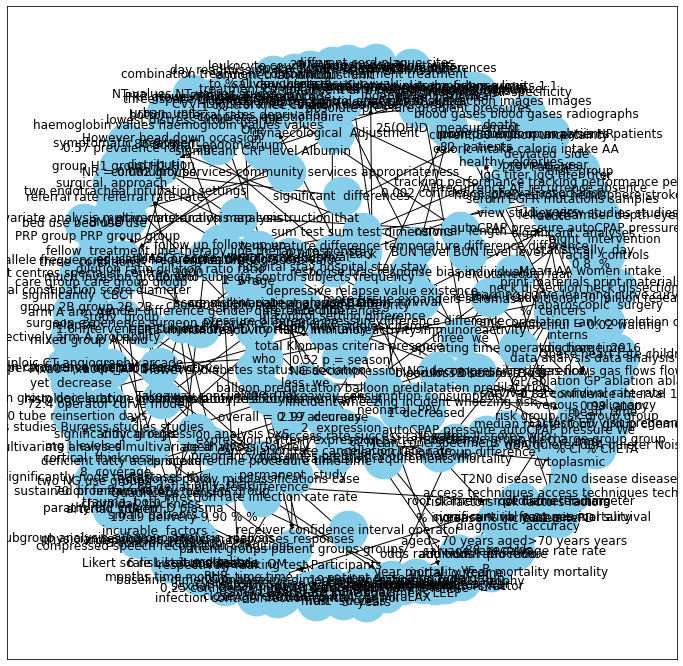

In [6]:
G_determine=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="was"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G_determine, k = 0.5) # k regulates the distance between nodes
nx.draw_networkx(G_determine, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [8]:
upload = files.upload()

Saving hetionet.csv to hetionet.csv


In [11]:
hetionet = pd.read_csv("hetionet.csv",encoding='latin-1')
hetionet = hetionet.drop(columns=['Unnamed: 0'])
hetionet

metaedge_x      relation  \
0                                              C20orf173     expresses   
1                                    Fondaparinux sodium     expresses   
2                       Peripheral neuropathy aggravated     expresses   
3                                      gonad development     expresses   
4                                             ERVMER34-1     expresses   
...                                                  ...           ...   
2250192                 malonyl-CoA biosynthetic process  participates   
2250193                                         SLC25A40  participates   
2250194                                           MRFAP1  participates   
2250195  regulation of isotype switching to IgA isotypes  participates   
2250196                                              ERG  participates   

             metaedge_y  
0        uterine cervix  
1        uterine cervix  
2        uterine cervix  
3        uterine cervix  
4        uterine cervix  
...                 ...  
2250192     Allesthesia  
2250193     Allesthesia  
2250194     Allesthesia  
2250195     Allesthesia  
2250196     Allesthesia  

[2250197 rows x 3 columns]

In [17]:
G_determine=nx.from_pandas_edgelist(hetionet[hetionet['relation']=="expresses"], "metaedge_x", "metaedge_y", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G_determine, k = 0.5) # k regulates the distance between nodes
nx.draw_networkx(G_determine, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

AttributeError: ignored

<Figure size 864x864 with 0 Axes>

In [15]:
!pip install 'scipy>=1.8'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Knowledge Graph embedding

## ComplEX

In [ ]:
from tqdm import tqdm
from complex.model import ComplEx
from complex.input_data import load_triples

def kge_complex(graph):
    #Récupérer les triples du KG existant à partir de notre KG
    triples = []
    for entity_1, relation, entity_2 in graph.edges(data='relation'):
        triples.append((entity_1, relation, entity_2))

    #Créer un dictionnaire qui associe chaque entité à un index unique :
    entity_to_idx = {entity: idx for idx, entity in enumerate(graph.nodes)}

    #Créer un dictionnaire qui associe chaque relation à un index unique :
    relation_to_idx = {relation: idx for idx, (entity_1, relation, entity_2) in enumerate(triples)}

    #Créer un objet ComplEx et définir les hyperparamètres du modèle :
    model = ComplEx(n_entities=len(entity_to_idx), n_relations=len(relation_to_idx), embedding_dim=100)

    #Entraîner le modèle sur les triples du KG :
    for epoch in range(100):
        model.fit(triples, nb_epoch=1, batch_size=128)
        print(f'Epoch {epoch}:')
        print(f'  Train loss: {model.evaluate(triples, batch_size=128)}')

    #Récupérer les embeddings des entités du KG :
    entity_embeddings = model.get_entity_embeddings()
    
    return entity_embeddings

## BiKE

In [ ]:
from pykeen.kge_models import Bike

# Initialiser le modèle Bike avec les paramètres souhaités
model = Bike(
    # Définir les dimensions de l'espace d'embedding
    embedding_dim=100,
    # Définir le nombre de couches cachées du réseau de neurones
    num_hidden_layers=2,
    # Définir le nombre de neurones par couche cachée
    hidden_dim=200,
    # Définir le nombre de contextes pris en compte par le modèle
    num_contexts=2,
    # Définir la fonction de perte à utiliser
    loss='pairwise',
    # Définir l'optimiseur à utiliser
    optimizer='adam',
    # Définir le nombre d'époques d'entraînement
    epochs=100,
    # Définir la taille du lot d'entraînement
    batch_size=64,
    # Définir le taux d'apprentissage
    learning_rate=0.01,
    # Définir le taux de dropout
    dropout_rate=0.5,
)

# Entraîner le modèle sur votre graph en utilisant les triplets générés
model.fit(graph, triplets)

## RDGCN

In [ ]:
from rdgcn.model import RDGCN

def rdgcn_kge(graph):
    
    #Créez un objet RDGCN (Relational Deep Graph Convolutional Network)
    rdgcn = RDGCN(graph)
    
    #Entraînez le modèle RDGCN
    rdgcn.fit()
    
    #Récupérez les embeddings pour les entités et les relations
    entity_embeddings = rdgcn.get_entity_embeddings()
    relation_embeddings = rdgcn.get_relation_embeddings()
    
    return entity_embeddings,relation_embeddings

## QUESTIONS EMBEDDING

## Roberta 

In [ ]:
from transformers import RobertaTokenizer, RobertaForQuestionAnswering, BertTokenizer, ElectraModel, BertModel, BertForSequenceClassification, ElectraForPreTraining, ElectraTokenizerFast
import torch

In [ ]:
def getQuestionEmbeddingRoberta(question):
    tokenizer = RobertaTokenizer.from_pretrained("deepset/roberta-base-squad2")
    model = RobertaForQuestionAnswering.from_pretrained("deepset/roberta-base-squad2")
    input_ids = tokenizer.encode(question, return_tensors="pt")
    question_embedding = model(input_ids)[0]
    return question_embedding
    

## Biobert

In [ ]:
def getQuestionEmbeddingBiobert(question):
    tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.2', do_lower_case=True,truncation=True)
    model = BertForSequenceClassification.from_pretrained("dmis-lab/biobert-base-cased-v1.2",
                                                      num_labels=len(question),
                                                      output_attentions=False,
                                                      output_hidden_states=False)
    input_ids = tokenizer.encode(question, return_tensors="pt")
    question_embedding = model(input_ids)[0]
    return question_embedding

## BioElectra

In [ ]:
def getQuestionEmbeddingBioelectra(question):
    model= ElectraForPreTraining.from_pretrained("kamalkraj/bioelectra-base-discriminator-pubmed")
    tokenizer = ElectraTokenizerFast.from_pretrained("kamalkraj/bioelectra-base-discriminator-pubmed")
    input_ids = tokenizer.encode(question, return_tensors="pt")
    question_embedding = model(input_ids)[0]
    return question_embedding

In [ ]:
getQuestionEmbeddingRoberta("What is the role of mRNA in protein synthesis?")

tensor([[ 0.9995, -8.4295, -9.2255, -8.9855, -8.4971, -9.1113, -6.1275, -8.8845,
         -5.0948, -7.2960, -9.5335, -7.2849]], grad_fn=<CloneBackward0>)

In [ ]:
getQuestionEmbeddingBiobert("What is the role of mRNA in protein synthesis?")

Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.2 were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification we

tensor([[ 0.0857,  0.3747, -0.2305, -0.5653, -0.4787,  0.1407, -0.3922, -0.3357,
         -0.1940,  0.1514, -0.0734, -0.0701,  0.1762, -0.8519,  0.2254,  0.1877,
         -0.3113,  0.4738,  0.0124,  0.1936, -0.3249, -0.6695, -1.1552, -0.4814,
         -0.1939, -0.2105, -0.0849,  0.8454,  0.4176, -0.1474,  0.3449, -0.6285,
         -0.2337,  0.2506,  0.1612,  0.2481,  1.1385,  0.0832, -0.3068,  0.0402,
         -0.8516,  0.5404, -0.4387,  0.0052, -0.6253, -0.3239]],
       grad_fn=<AddmmBackward0>)

In [ ]:
getQuestionEmbeddingBioelectra("What is the role of mRNA in protein synthesis?")

tensor([[-0.0572,  0.0523,  0.0643,  0.0940,  0.0354, -0.0316,  0.0080,  0.0342,
          0.0743,  0.0680,  0.0362, -0.0572]], grad_fn=<SqueezeBackward1>)

In [ ]:
from pykeen.pipeline import pipeline

# Define the pipeline
pipeline = pipeline(
    model="ComplEx",
    dataset='hetionet'
)

# Train the model
results = pipeline.run()

# Get the embeddings of entities and relations
complex_ent_embeddings = results['ent_embeddings']
complex_rel_embeddings = results['rel_embeddings']

No random seed is specified. Setting to 3746926026.
No cuda devices were available. The model runs on CPU


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/7032 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7032 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7032 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7032 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7032 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/225k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 29980.90s seconds


AttributeError: 'PipelineResult' object has no attribute 'run'

In [ ]:
pipeline

PipelineResult(random_seed=3746926026, model=ComplEx(
  (loss): MarginRankingLoss(
    (margin_activation): ReLU()
  )
  (interaction): ComplExInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (regularizer): LpRegularizer()
      (_embeddings): Embedding(45158, 400)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (regularizer): LpRegularizer()
      (_embeddings): Embedding(24, 400)
    )
  )
  (weight_regularizers): ModuleList()
), training=TriplesFactory(num_entities=45158, num_relations=24, create_inverse_triples=False, num_triples=1800157, path="C:\Users\Mohcine\.data\pykeen\datasets\hetionet\hetionet-v1.0-edges.sif.gz"), training_loop=<pykeen.training.slcwa.SLCWATrainingLoop object at 0x000002A54D944550>, losses=[7.922069654834962, 1.5211074077889781, 1.1209754599629138, 0.8032952777286981, 0.4885907879181893], metric_results=<pykeen.evaluation.rank_based_evaluator.RankBasedMetricResults object at 0x000002A5525B2910>, tra

In [ ]:
pipeline.save_to_directory('hetionet_embedding')

INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=45158, num_relations=24, create_inverse_triples=False, num_triples=1800157, path="C:\Users\Mohcine\.data\pykeen\datasets\hetionet\hetionet-v1.0-edges.sif.gz") to file:///C:/Users/Mohcine/Desktop/MSD/S3/Projet%20S3/hetionet_embedding/training_triples


ValueError: relative path can't be expressed as a file URI

In [ ]:
from typing import List

import pykeen.nn


model = pipeline.model

entity_representation_modules: List['pykeen.nn.Representation'] = model.entity_representations
relation_representation_modules: List['pykeen.nn.Representation'] = model.relation_representations

In [ ]:
entity_representation_modules

ModuleList(
  (0): Embedding(
    (regularizer): LpRegularizer()
    (_embeddings): Embedding(45158, 400)
  )
)

In [ ]:
relation_representation_modules

ModuleList(
  (0): Embedding(
    (regularizer): LpRegularizer()
    (_embeddings): Embedding(24, 400)
  )
)

In [ ]:
import pickle
with open('pipeline','wb') as f:
     pickle.dump(pipeline,f)

In [ ]:
pipeline.predict()

AttributeError: 'PipelineResult' object has no attribute 'predict'

In [ ]:
from pykeen.pipeline import pipeline

# Define the pipeline
pipeline = pipeline(
    model="TransE",
    dataset='hetionet'
)

# Train the model
results = pipeline.run()

# Get the embeddings of entities and relations
transe_ent_embeddings = results['ent_embeddings']
transe_rel_embeddings = results['rel_embeddings']

In [ ]:
from pykeen.pipeline import pipeline

# Define the pipeline
pipeline = pipeline(
    model="RGCN",
    dataset='hetionet'
)

# Train the model
results = pipeline.run()

# Get the embeddings of entities and relations
rgcn_ent_embeddings = results['ent_embeddings']
rgcn_rel_embeddings = results['rel_embeddings']

In [ ]:
hits_at_10 = pipeline.get_metric('hits@10')
hits_at_10

0.03673006843836103

In [ ]:
# Get the trained model
trained_model = pipeline.train_model()

# Get the graph embedding for all concepts in the graph
graph_embedding = trained_model.predict(pipeline.dataset.all_entities)

AttributeError: 'PipelineResult' object has no attribute 'train_model'

In [ ]:
import tensorflow as tf

# Use the word embedding obtained from BioBERT
question_embedding = getQuestionEmbeddingBiobert("What is the role of mRNA in protein synthesis?")

# Use the graph embedding obtained from pykeen
graph_embedding = pipeline.get_embeddings()

# Concatenate the word and graph embeddings
merged_embedding = tf.concat([question_embedding, graph_embedding], axis=-1)

# Use the merged embedding as input for a final dense layer for prediction
output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(merged_embedding)

# Create a model and compile it
model = tf.keras.Model(inputs=[question_embedding, graph_embedding], outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.2 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification we

AttributeError: 'PipelineResult' object has no attribute 'get_embeddings'